<a href="https://colab.research.google.com/github/Tasnim-Mohona/Advanced-Data-Structure-and-Algorithms/blob/main/Regularizer%26Classifiers_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, Ridge
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.linear_model import RidgeCV


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [2]:
#define URL where data is located
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DataPreprocessing

In [61]:
class DataPreprocessing:
    def __init__(self,datapath):
        self.datapath = datapath

    def read_data(self):
        df = pd.read_csv(self.datapath,header=None)
        x = df.iloc[:,:-1]
        y = df.iloc[:,-1]
        return (x,y)

    def split(self,x,y):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        return(X_train, X_test, y_train, y_test)

    def standardization(self,X_train,X_test):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        print(X_train_scaled)
        print(X_test_scaled)
        return (X_train_scaled,X_test_scaled)

    # def cross_validate(self, model, cv=5):
    #     scores = cross_val_score(model, self.data, self.target, cv=cv)
    #     return scores.mean(), scores.std()
    def cross_validate(self, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)):
        scores = cross_val_score(self.model, self.X, self.y, cv=cv, scoring='accuracy')  # You can change the scoring metric
        return scores


    @classmethod
    def discretize(cls, x, n_bins=5, strategy='uniform'):
        # Create a KBinsDiscretizer object
        discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
        # Discretize the data
        discretized_data = discretizer.fit_transform(x)
        #Convert the discretized array back to a DataFrame
        discretized_df = pd.DataFrame(discretized_data, columns=x.columns)
        return discretized_df
    # def discretize(cls, x, n_bins=5, strategy='uniform'):
    #     # Create a KBinsDiscretizer object
    #     discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)

    #     # Discretize the data
    #     discretized_data = discretizer.fit_transform(x)
    #     return discretized_data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

class Plotter:
    def __init__(self, X, y, model):
        self.X = X
        self.y = y
        self.model = model

    def cross_validate(self, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)):
        """
        Perform cross-validation and return the scores.

        Parameters:
        - cv: Cross-validation strategy (default is StratifiedKFold with 5 folds)

        Returns:
        - scores: Array of cross-validation scores
        """
        scores = cross_val_score(self.model, self.X, self.y, cv=cv, scoring='accuracy')  # You can change the scoring metric
        return scores

    def plot_boxplot(self, scores):
        """
        Create a box plot of the cross-validation scores.

        Parameters:
        - scores: Array of cross-validation scores

        Returns:
        - None (plots the box plot)
        """
        plt.figure(figsize=(8, 6))
        plt.boxplot(scores, vert=False)
        plt.title('Cross-Validation Box Plot')
        plt.xlabel('Accuracy')
        plt.show()

# Example usage:
# Assuming X is your features and y is your target variable
# Also assuming you have instantiated your classifier (e.g., RandomForestClassifier)
# clf = RandomForestClassifier()

# ## Instantiate the Plotter class
# # plotter = Plotter(X=X, y=y, clf=clf)
# # plotter = Plotter(X, y, clf)

# # Perform cross-validation
# cv_scores = plotter.cross_validate()

# # Plot the box plot
# plotter.plot_boxplot(cv_scores)


# Regularizer


In [62]:
class Regularizer:
    def __init__(self,X_train,X_test,y_train,y_test,X_train_scaled,X_test_scaled):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.X_train_scaled = X_train_scaled
        self.X_test_scaled = X_test_scaled

    def lasso(self):

        lasso_cv = LassoCV(alphas=[0.1,.2,.3], cv=10, max_iter=11000)
        lasso_cv.fit(self.X_train, y_train)

       # Get the selected alpha (regularization parameter)
        best_alpha = lasso_cv.alpha_
        print(f"Best alpha: {best_alpha}")
        lasso_model = Lasso(alpha=best_alpha)
        lasso_model.fit(self.X_train_scaled, self.y_train)
        coefficients = lasso_model.coef_
        print(coefficients)
        X_train_lasso = self.X_train_scaled * coefficients
        print(X_train_lasso)
        X_test_lasso = self.X_test_scaled * coefficients
        print(X_test_lasso)
        return (X_train_lasso, X_test_lasso,coefficients)

    def ridge(self):

        ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=10)
        ridge_cv.fit(X_train_scaled, y_train)

        # Get the selected alpha (regularization parameter)
        ridge_best_alpha = ridge_cv.alpha_
        print(f"Best alpha: {ridge_best_alpha}")

        ridge_model = Ridge(alpha=ridge_best_alpha)
        ridge_model.fit(self.X_train_scaled, self.y_train)
        coefficients = ridge_model.coef_

        X_train_ridge = self.X_train_scaled * coefficients
        X_test_ridge = self.X_test_scaled * coefficients
        print(X_train_ridge)
        print(X_test_ridge)
        return (X_train_ridge, X_test_ridge)


    def pls(self, n_components=7):
        pls_model = PLSRegression(n_components=n_components)
        X_train_pls = pls_model.fit_transform(self.X_train_scaled, self.y_train)
        weights = pls_model.x_weights_

        return weights

#     def pls(self, n_components=7):
#         pls_model = PLSRegression(n_components=7)
# #       n_components=components
#         X_train_pls = pls_model.fit_transform(self.X_train_scaled, self.y_train)
#         weights = pls_model.x_loadings_
# #         train_feature_pls = self.X_train_scaled * weights
# #         test_feature_pls = self.X_test_scaled * weights

#         print(weights)
#         return weights

    def select_features(self, lasso_features):
        selected_columns = self.X_train.columns[lasso_features]
        X_train_selected = self.X_train[selected_columns]
        X_test_selected = self.X_test[selected_columns]
        return X_train_selected, X_test_selected

    def mutual_information(self):
        mi_scores = mutual_info_classif(self.X_train_scaled, self.y_train)
        return mi_scores


# Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

class Classifier:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def plot_roc_auc(self, model, probabilities, title_suffix=""):
        roc_auc = roc_auc_score(self.y_test, probabilities)

        # ROC curve and AUC plot
        fpr, tpr, thresholds = roc_curve(self.y_test, probabilities)
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - {}'.format(title_suffix))
        plt.legend(loc="lower right")
        plt.show()

        return roc_auc

    def knn(self):
        knn_classifier = KNeighborsClassifier(n_neighbors=3)
        knn_classifier.fit(self.X_train, self.y_train)
        predictions_knn = knn_classifier.predict(self.X_test)
        probabilities_knn = knn_classifier.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_knn)
        recall = recall_score(self.y_test, predictions_knn)
        accuracy = accuracy_score(self.y_test, predictions_knn)
        f1_measure = f1_score(self.y_test, predictions_knn)
        roc_auc = self.plot_roc_auc(knn_classifier, probabilities_knn, title_suffix="Regularized KNN Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def svm(self):
        svm_classifier = SVC(probability=True)
        svm_classifier.fit(self.X_train, self.y_train)
        predictions_svm = svm_classifier.predict(self.X_test)
        probabilities_svm = svm_classifier.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_svm)
        recall = recall_score(self.y_test, predictions_svm)
        accuracy = accuracy_score(self.y_test, predictions_svm)
        f1_measure = f1_score(self.y_test, predictions_svm)
        #roc_auc = self.plot_roc_auc(svm_classifier, probabilities_svm)
        roc_auc = self.plot_roc_auc(svm_classifier, probabilities_svm, title_suffix="Regularized SVM Classification")
        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

#     def knn(self):
#         knn_classifier = KNeighborsClassifier(n_neighbors=3)
#         knn_classifier.fit(self.X_train, self.y_train)
#         predictions_knn = knn_classifier.predict(self.X_test)
#         probabilities_knn = knn_classifier.predict_proba(self.X_test)[:, 1]

#         precision = precision_score(self.y_test, predictions_knn)
#         recall = recall_score(self.y_test, predictions_knn)
#         accuracy = accuracy_score(self.y_test, predictions_knn)
#         f1_measure = f1_score(self.y_test, predictions_knn)
#         roc_auc = self.plot_roc_auc(knn_classifier, probabilities_knn)

#         result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
#         return result_dict

    def lda(self):
        lda_model = LinearDiscriminantAnalysis()
        lda_model.fit(self.X_train, self.y_train)
        predictions_lda = lda_model.predict(self.X_test)
        probabilities_lda = lda_model.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_lda)
        recall = recall_score(self.y_test, predictions_lda)
        accuracy = accuracy_score(self.y_test, predictions_lda)
        f1_measure = f1_score(self.y_test, predictions_lda)
#         roc_auc = self.plot_roc_auc(lda_model, probabilities_lda)

        roc_auc = self.plot_roc_auc(lda_model, probabilities_lda, title_suffix="Regularized LDA Classification")
        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def decision_tree(self):
        decision_tree = DecisionTreeClassifier()
        decision_tree.fit(self.X_train, self.y_train)
        predictions_decision_tree = decision_tree.predict(self.X_test)
        probabilities_decision_tree = decision_tree.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_decision_tree)
        recall = recall_score(self.y_test, predictions_decision_tree)
        accuracy = accuracy_score(self.y_test, predictions_decision_tree)
        f1_measure = f1_score(self.y_test, predictions_decision_tree)
#         roc_auc = self.plot_roc_auc(decision_tree, probabilities_decision_tree)
        roc_auc = self.plot_roc_auc(decision_tree, probabilities_decision_tree, title_suffix="Regularized DT Classification")
        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict


# Test Classifier for PLots


In [63]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class Classifier:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def plot_roc_auc(self, model, probabilities, title_suffix=""):
        roc_auc = roc_auc_score(self.y_test, probabilities)

        # ROC curve and AUC plot
        fpr, tpr, thresholds = roc_curve(self.y_test, probabilities)
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - {}'.format(title_suffix))
        plt.legend(loc="lower right")
        plt.show()

        return roc_auc


    def plot_radar(self, results_df, title_suffix=""):
        categories = list(results_df.columns)
        values = results_df.values.T

        N = len(categories)
        angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

        values += values[:1]
        angles += angles[:1]

        plt.figure(figsize=(8, 8))
        ax = plt.subplot(111, polar=True)
        ax.fill(angles, values, color='red', alpha=0.25)
        ax.set_yticklabels([])
        plt.title('Radar Plot - {}'.format(title_suffix))
        plt.show()

    def plot_scatter(self, results_dict, title_suffix=""):
        categories = list(results_dict.keys())
        values = list(results_dict.values())

        plt.figure(figsize=(8, 6))
        plt.scatter(categories, values, color='blue')
        plt.title('Scatter Plot - {}'.format(title_suffix))
        plt.xlabel('Metrics')
        plt.ylabel('Values')
        plt.show()

    def cross_validate_models(self, X, y, models, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)):
        """
        Perform cross-validation for multiple models and return the scores.

        Parameters:
        - X: Features
        - y: Target variable
        - models: List of tuples (model_name, model_instance)
        - cv: Cross-validation strategy (default is StratifiedKFold with 5 folds)

        Returns:
        - scores_df: DataFrame containing scores for each model
        """
        scores_dict = {}

        for model_name, model in models:
            scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
            scores_dict[model_name] = scores

        scores_df = pd.DataFrame(scores_dict)
        return scores_df

    # ... (other methods)

    # def knn(self):
    #     # ... (same as before)

    # def svm(self):
    #     # ... (same as before)

    # def lda(self):
    #     # ... (same as before)

    # def decision_tree(self):
    #     # ... (same as before)


    def knn(self):
        knn_classifier = KNeighborsClassifier(n_neighbors=3)
        knn_classifier.fit(self.X_train, self.y_train)
        predictions_knn = knn_classifier.predict(self.X_test)
        probabilities_knn = knn_classifier.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_knn)
        recall = recall_score(self.y_test, predictions_knn)
        accuracy = accuracy_score(self.y_test, predictions_knn)
        f1_measure = f1_score(self.y_test, predictions_knn)
        roc_auc = self.plot_roc_auc(knn_classifier, probabilities_knn, title_suffix="KNN Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def svm(self):
        svm_classifier = SVC(probability=True)
        svm_classifier.fit(self.X_train, self.y_train)
        predictions_svm = svm_classifier.predict(self.X_test)
        probabilities_svm = svm_classifier.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_svm)
        recall = recall_score(self.y_test, predictions_svm)
        accuracy = accuracy_score(self.y_test, predictions_svm)
        f1_measure = f1_score(self.y_test, predictions_svm)
        roc_auc = self.plot_roc_auc(svm_classifier, probabilities_svm, title_suffix="SVM Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def lda(self):
        lda_model = LinearDiscriminantAnalysis()
        lda_model.fit(self.X_train, self.y_train)
        predictions_lda = lda_model.predict(self.X_test)
        probabilities_lda = lda_model.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_lda)
        recall = recall_score(self.y_test, predictions_lda)
        accuracy = accuracy_score(self.y_test, predictions_lda)
        f1_measure = f1_score(self.y_test, predictions_lda)
        roc_auc = self.plot_roc_auc(lda_model, probabilities_lda, title_suffix="LDA Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def decision_tree(self):
        decision_tree = DecisionTreeClassifier()
        decision_tree.fit(self.X_train, self.y_train)
        predictions_decision_tree = decision_tree.predict(self.X_test)
        probabilities_decision_tree = decision_tree.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_decision_tree)
        recall = recall_score(self.y_test, predictions_decision_tree)
        accuracy = accuracy_score(self.y_test, predictions_decision_tree)
        f1_measure = f1_score(self.y_test, predictions_decision_tree)
        roc_auc = self.plot_roc_auc(decision_tree, probabilities_decision_tree, title_suffix="Decision Tree Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict




In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

class Classifier:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def plot_roc_auc(self, model, probabilities, title_suffix=""):
        roc_auc = roc_auc_score(self.y_test, probabilities)

        # ROC curve and AUC plot
        fpr, tpr, thresholds = roc_curve(self.y_test, probabilities)
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - {}'.format(title_suffix))
        plt.legend(loc="lower right")
        plt.show()

        return roc_auc

    def cross_validate_models(self, models, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)):
        scores_dict = {}

        for model_name, model in models:
            scores = cross_val_score(model, self.X_train, self.y_train, cv=cv, scoring='accuracy')
            scores_dict[model_name] = scores

        return scores_dict

    def knn(self):
        knn_classifier = KNeighborsClassifier(n_neighbors=3)
        knn_classifier.fit(self.X_train, self.y_train)
        predictions_knn = knn_classifier.predict(self.X_test)
        probabilities_knn = knn_classifier.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_knn)
        recall = recall_score(self.y_test, predictions_knn)
        accuracy = accuracy_score(self.y_test, predictions_knn)
        f1_measure = f1_score(self.y_test, predictions_knn)
        roc_auc = self.plot_roc_auc(knn_classifier, probabilities_knn, title_suffix="KNN Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def svm(self):
        svm_classifier = SVC(probability=True)
        svm_classifier.fit(self.X_train, self.y_train)
        predictions_svm = svm_classifier.predict(self.X_test)
        probabilities_svm = svm_classifier.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_svm)
        recall = recall_score(self.y_test, predictions_svm)
        accuracy = accuracy_score(self.y_test, predictions_svm)
        f1_measure = f1_score(self.y_test, predictions_svm)
        roc_auc = self.plot_roc_auc(svm_classifier, probabilities_svm, title_suffix="SVM Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def lda(self):
        lda_model = LinearDiscriminantAnalysis()
        lda_model.fit(self.X_train, self.y_train)
        predictions_lda = lda_model.predict(self.X_test)
        probabilities_lda = lda_model.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_lda)
        recall = recall_score(self.y_test, predictions_lda)
        accuracy = accuracy_score(self.y_test, predictions_lda)
        f1_measure = f1_score(self.y_test, predictions_lda)
        roc_auc = self.plot_roc_auc(lda_model, probabilities_lda, title_suffix="LDA Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict

    def decision_tree(self):
        decision_tree = DecisionTreeClassifier()
        decision_tree.fit(self.X_train, self.y_train)
        predictions_decision_tree = decision_tree.predict(self.X_test)
        probabilities_decision_tree = decision_tree.predict_proba(self.X_test)[:, 1]

        precision = precision_score(self.y_test, predictions_decision_tree)
        recall = recall_score(self.y_test, predictions_decision_tree)
        accuracy = accuracy_score(self.y_test, predictions_decision_tree)
        f1_measure = f1_score(self.y_test, predictions_decision_tree)
        roc_auc = self.plot_roc_auc(decision_tree, probabilities_decision_tree, title_suffix="Decision Tree Classification")

        result_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f-score': f1_measure, 'ROC-AUC': roc_auc}
        return result_dict



# Saver

In [64]:
!pip install xlsxwriter

In [65]:
import pandas as pd

class Saver:
    def __init__(self, data, regularizer, c_name, filename):
        self.data = data
        self.regularizer = regularizer
        self.c_name = c_name
        self.datapath = filename

    def save(self):
        try:
            # Try reading the existing file
            frame = pd.read_excel(self.datapath)
        except FileNotFoundError:
            # If the file doesn't exist, create a new DataFrame
            frame = pd.DataFrame()

        # Create a dictionary with the data
        data = {
            'Regularizer': [self.regularizer],
            'Accuracy': [self.data['Accuracy']],
            'Error': [1 - self.data['Accuracy']],
            'Precision': [self.data['Precision']],
            'Recall': [self.data['Recall']],
            'F-measure': [self.data['f-score']],
            'Classifier': [self.c_name],
        }

        # Convert the data dictionary to a DataFrame
        new_frame = pd.DataFrame(data)

        # Concatenate the new DataFrame with the existing DataFrame
        frame = pd.concat([frame, new_frame], ignore_index=True)

        # Save the concatenated DataFrame to Excel
        frame.to_excel(self.datapath, index=False, engine='xlsxwriter')
        print(f"Results saved to {self.datapath}")

# Load Dataset

In [66]:
path="/content/drive/MyDrive/Datasets/ReLink/EQ.arff"
#path="E:\AEEEM - Copy\EQ.arff"
new_obj = DataPreprocessing(path)
x,y = new_obj.read_data()

X_train, X_test, y_train, y_test = new_obj.split(x,y)
new_obj.cross_validate
X_train_scaled,X_test_scaled = new_obj.standardization(X_train,X_test)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

x
y
print(type(x))
print(type(y))
print(type(X_train_scaled))
print(type(X_test_scaled))
print(type(X_train))
print(type(y_train))

# X_train_scaled = pd.DataFrame(X_train_scaled)
# X_test_scaled = pd.DataFrame(X_test_scaled)
# print(type(X_train_scaled))
# print(type(X_test_scaled))


[[-0.35111729 -0.2118787  -0.43934881 ... -0.45512285 -0.63315571
  -0.20843288]
 [-0.35111729 -0.38494044 -0.43934881 ... -0.45512285 -0.61363032
  -0.39012524]
 [-0.35111729 -0.38494044 -0.43934881 ... -0.45512285 -0.63596578
  -0.39012524]
 ...
 [-0.35111729 -0.38494044 -0.43934881 ... -0.45512285 -0.63596578
  -0.39012524]
 [-0.35111729 -0.38494044 -0.43934881 ... -0.45512285 -0.63023688
  -0.39012524]
 [-0.35111729 -0.38494044  1.66967629 ... -0.45512285  0.37286415
  -0.39012524]]
[[ 0.74077919 -0.38494044 -0.13455565 ... -0.29345735 -0.54415837
  -0.39012524]
 [-0.19513208  0.17985095  0.93984772 ...  2.36571364  1.5293945
   0.0812413 ]
 [-0.35111729 -0.24721591 -0.43934881 ... -0.21489093 -0.62789818
  -0.24134422]
 ...
 [-0.35111729 -0.38494044 -0.43934881 ... -0.45512285 -0.63596578
  -0.39012524]
 [-0.35111729 -0.38494044 -0.43934881 ... -0.45512285 -0.62138972
  -0.39012524]
 [-0.35111729 -0.17110498  1.58054148 ...  0.02836278  1.52132691
  -0.15620993]]
<class 'pandas.co

In [ ]:
# new_obj.cross_validate(svm)

# Lasso

In [67]:
# Lasso
lasso_model = Regularizer(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled)
train_feature_lasso, test_feature_lasso,coefficients = lasso_model.lasso()

# Calculate the number of non-zero columns
num_non_zero_train = (train_feature_lasso != 0).sum(axis=0)
num_non_zero_test = (test_feature_lasso != 0).sum(axis=0)

# Print the results
print("Number of non-zero columns for training data:")
print(num_non_zero_train)

print("\nNumber of non-zero columns for test data:")
print(num_non_zero_test)

# Total number of non-zero columns
total_non_zero_train = (num_non_zero_train != 0).sum()
total_non_zero_test = (num_non_zero_test != 0).sum()

print("\nTotal number of non-zero columns for training data:", total_non_zero_train)
print("\nTotal number of non-zero columns for test data:", total_non_zero_test)
components= total_non_zero_train
print(type(train_feature_lasso))
print(type(components))
lasso_features=train_feature_lasso.iloc[:,coefficients!=0]

Best alpha: 0.1
[-0.         -0.         -0.          0.          0.         -0.
 -0.         -0.         -0.03988018 -0.         -0.          0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.         -0.         -0.29411038 -0.         -0.         -0.
 -0.         -0.         -0.01602363 -0.         -0.         -0.05360716
 -0.          0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.03223396 -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.09704711 -0.04038321 -0.         -0.         -0.
 -0.        ]
      0    1    2    3    4    5    6    7         8    9   ...   51   52  \
0    0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  0.019429  0.0  ... -0.0  0.0   
1    0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  0.019429  0.0  ... -0.0  0.0   
2    0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  0.019429  0.0  ... -0.0  0.0   
3   

In [14]:
print(type(components))

<class 'numpy.int64'>


In [68]:
components

7

In [16]:
lasso_features
#[32, 51, 3, 15, 38, 45, 41, 48, 57, 47]

,8,20,26,29,40,55,56
0,0.019429,0.002193,0.003423,0.033924,0.026486,0.024084,0.025175
1,0.019429,0.079243,0.001179,0.022018,0.018181,-0.006123,-0.001330
2,0.019429,0.236368,0.003423,0.033924,0.020949,0.039187,0.019874
3,0.019429,0.164988,0.003423,0.033924,0.015413,0.054290,-0.017234
4,-0.029189,0.024474,0.001179,0.022018,0.009876,-0.096743,0.009272
...,...,...,...,...,...,...,...
254,-0.101048,-1.207947,0.003423,-0.180375,-0.186673,-0.021226,-0.038438
255,0.019429,0.236368,0.003423,0.010113,0.009876,0.054290,0.025175
256,0.019429,0.236368,0.003423,0.033924,0.026486,0.054290,0.030476
257,0.019429,0.176864,0.003423,0.022018,0.020949,0.016532,-0.006631


In [ ]:
print(type(train_feature_lasso))


NameError: ignored

In [ ]:
###BOXPLOT LASSO###

# BOX PLOT LASSO

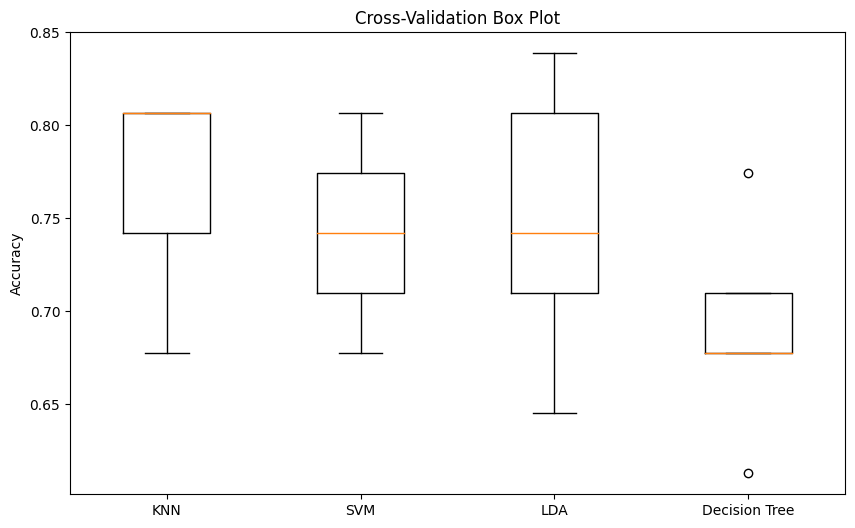

<Figure size 1600x1200 with 0 Axes>

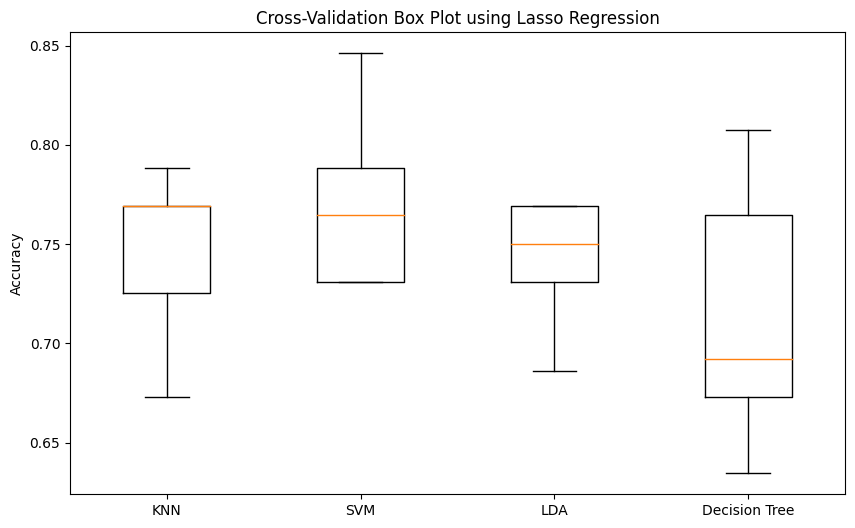

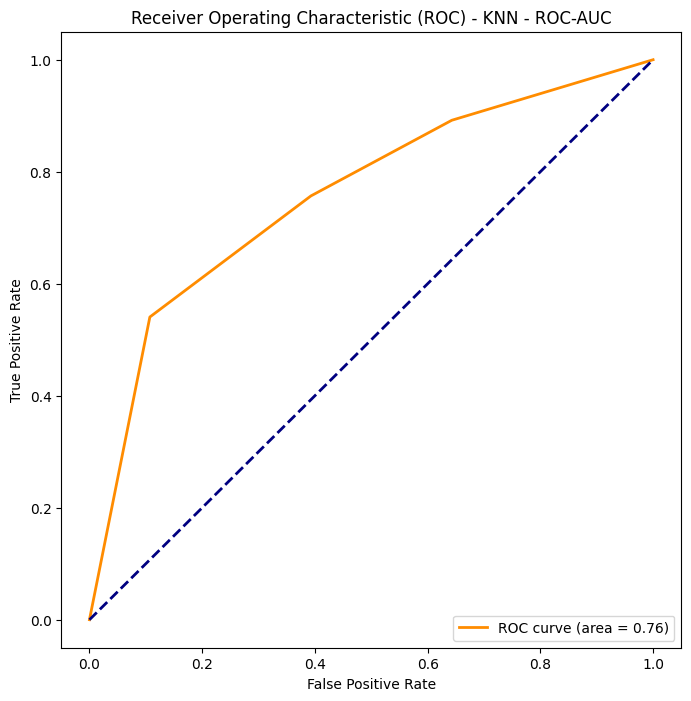

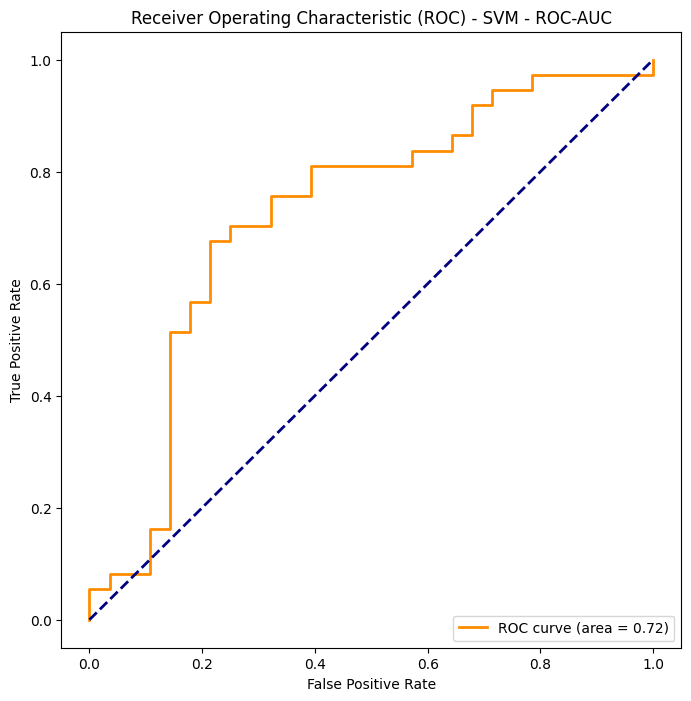

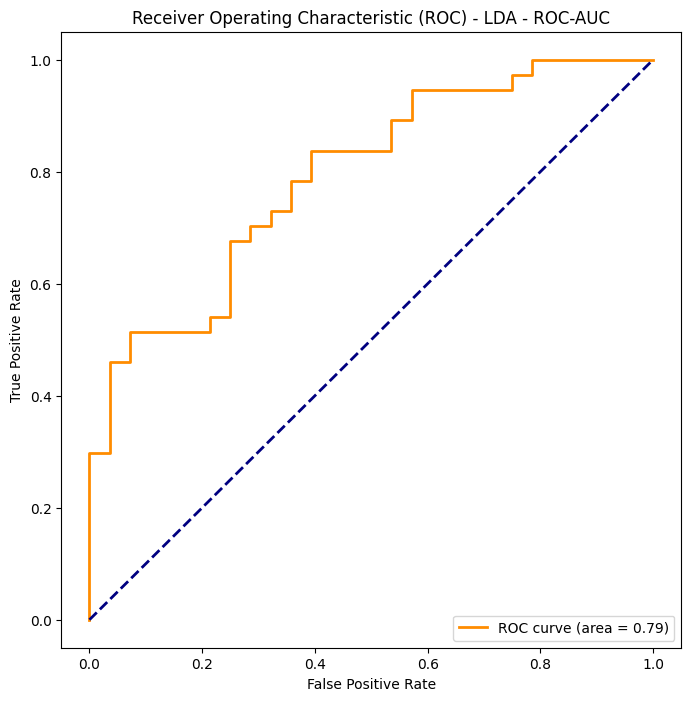

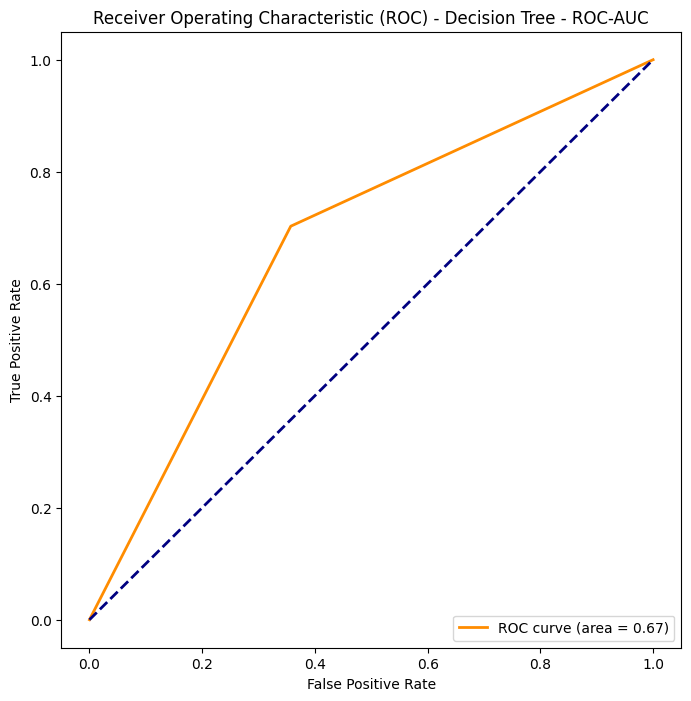

TypeError: ignored

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Assuming X and y are your features and target variable, respectively
clf = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)

models_to_cross_validate = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(probability=True)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Perform cross-validation and get scores
cross_val_scores = clf.cross_validate_models(train_feature_lasso, y_train, models_to_cross_validate)


# Create a box plot of the cross-validation scores
plt.figure(figsize=(16, 12))

# Create a box plot of the cross-validation scores

plt.figure(figsize=(10, 6))
plt.boxplot(cross_val_scores.values, labels=cross_val_scores.keys())
plt.title('Cross-Validation Box Plot using Lasso Regression')
plt.ylabel('Accuracy')
plt.show()

# ROC-AUC plot for each model
for model_name, model in models_to_cross_validate:
    probabilities = model.fit(clf.X_train, clf.y_train).predict_proba(clf.X_test)[:, 1]
    clf.plot_roc_auc(model, probabilities, title_suffix=f'{model_name} - ROC-AUC')

# Radar plot for each model
plt.figure(figsize=(12, 8))
for model_name, model in models_to_cross_validate:
    results_dict = clf.cross_validate_models([(model_name, model)])[model_name]
    print(f"Type of results_dict for {model_name}: {type(results_dict)}")
    print(f"Content of results_dict for {model_name}: {results_dict}")

    clf.plot_radar(results_dict, title_suffix=f'{model_name} - Radar')

# Scatter plot for each model
plt.figure(figsize=(12, 8))
for model_name, model in models_to_cross_validate:
    results_dict = clf.cross_validate_models([(model_name, model)])[model_name]
    clf.plot_scatter(results_dict, title_suffix=f'{model_name} - Scatter')


plt.tight_layout()
plt.show()

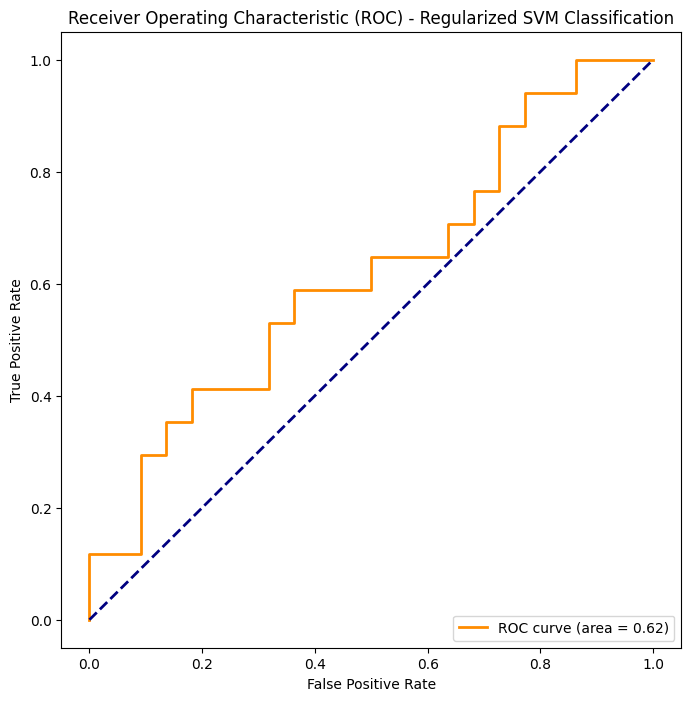

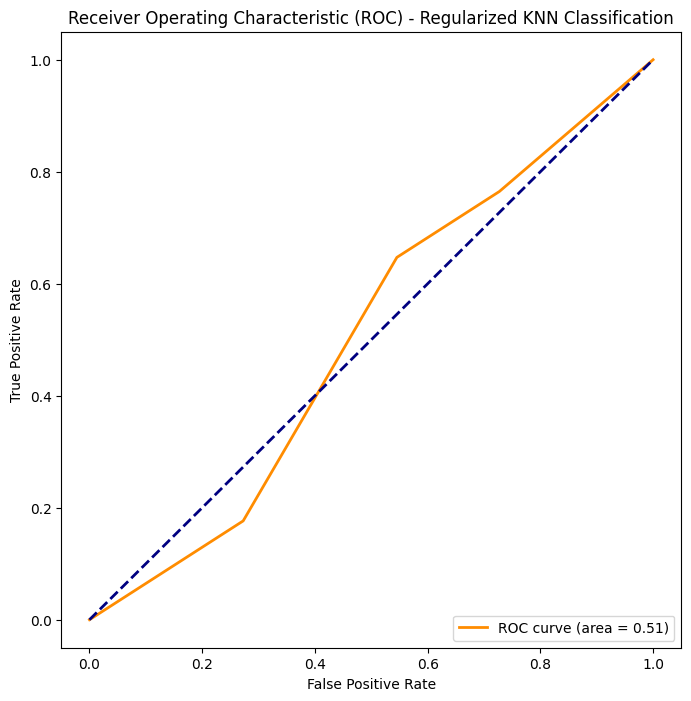

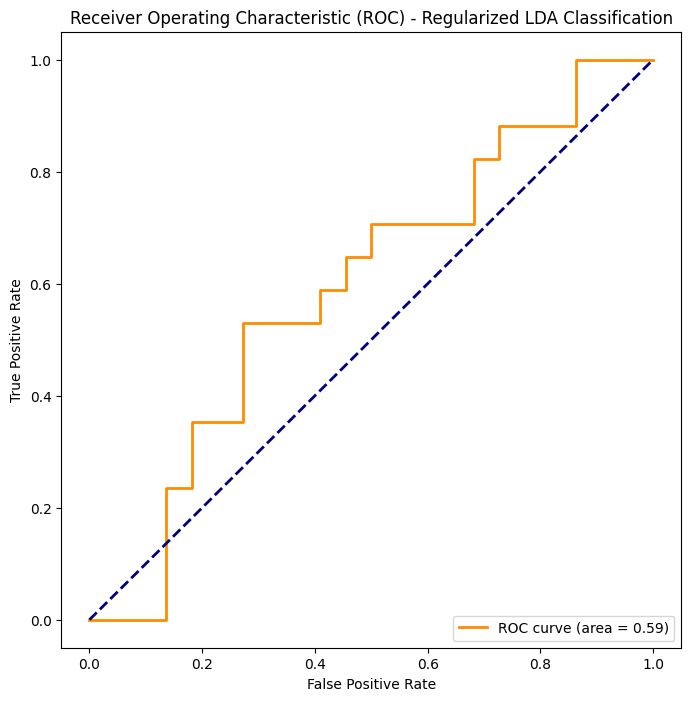

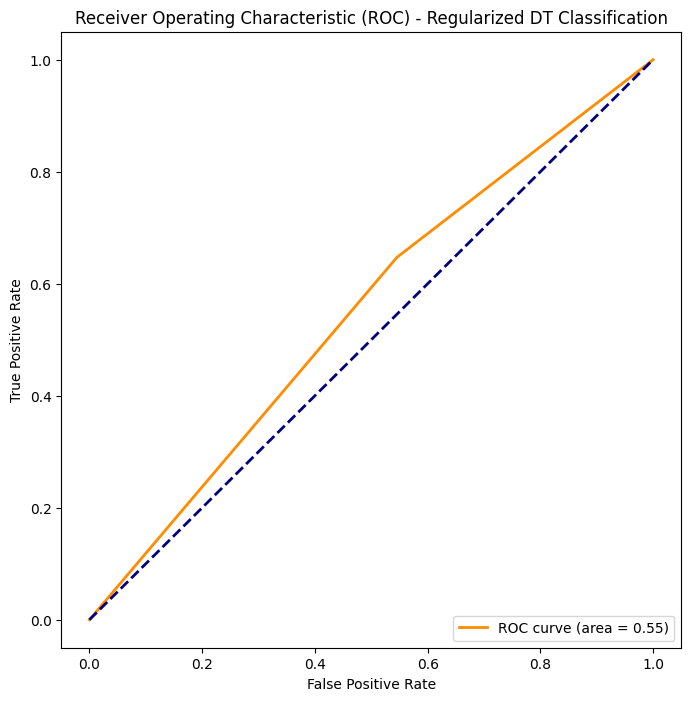

In [ ]:
#Lasso reggressed Classifier Fine
clasification = Classifier(train_feature_lasso,test_feature_lasso,y_train, y_test)
# cv=new_obj.cross_validate()
d_svm = clasification.svm()
d_knn = clasification.knn()
d_lda = clasification.lda()
d_dt = clasification.decision_tree()

#  Example usage:
# # Assuming X and y are your features and target variable, respectively
# # clf = Classifier(X_train, y_train)

# models_to_cross_validate = [
#     ('KNN', KNeighborsClassifier(n_neighbors=3)),
#     ('SVM', SVC(probability=True)),
#     ('LDA', LinearDiscriminantAnalysis()),
#     ('Decision Tree', DecisionTreeClassifier())
# ]

# # Perform cross-validation and get scores
# cross_val_scores = clf.cross_validate_models(models_to_cross_validate)

# # Create a box plot of the cross-validation scores
# plt.figure(figsize=(10, 6))
# plt.boxplot(cross_val_scores.values(), labels=cross_val_scores.keys())
# plt.title('Cross-Validation Box Plot')
# plt.ylabel('Accuracy')
# plt.show()

In [ ]:
# Assuming you have instances of your Classifier class named svm, knn, lda, decision_tree
svm = Classifier(X_train, X_test, y_train, y_test)
knn = Classifier(X_train, X_test, y_train, y_test)
lda = Classifier(X_train, X_test, y_train, y_test)
decision_tree = Classifier(X_train, X_test, y_train, y_test)

In [ ]:
#lasso_svm = Saver(svm.svm(), 'Lasso', 'SVM', 'C:\\Users\\iit\\Downloads\\svm.xlsx')
lasso_svm = Saver(svm.svm(), 'Lasso', 'SVM', '/content/drive/MyDrive/Datasets/Results/svm_lasso.xlsx')
lasso_svm.save()

#lasso_knn = Saver(knn.knn(), 'Lasso', 'KNN', 'C:\\Users\\iit\\Downloads\\knn.xlsx')
lasso_knn = Saver(knn.knn(), 'Lasso', 'KNN', '/content/drive/MyDrive/Datasets/Results/knn_lasso.xlsx')
lasso_knn.save()

#lasso_lda = Saver(lda.lda(), 'Lasso', 'LDA', 'C:\\Users\\iit\\Downloads\\lda.xlsx')
lasso_lda = Saver(lda.lda(), 'Lasso', 'LDA', '/content/drive/MyDrive/Datasets/Results/lda_lasso.xlsx')
lasso_lda.save()

#lasso_dt = Saver(decision_tree.decision_tree(), 'Lasso', 'Decision Tree', 'C:\\Users\\iit\\Downloads\\dt.xlsx')
lasso_dt = Saver(decision_tree.decision_tree(), 'Lasso', 'Decision Tree', '/content/drive/MyDrive/Datasets/Results/dt_lasso.xlsx')
lasso_dt.save()

AttributeError: ignored

# Ridge

In [ ]:
#Ridge
from sklearn.linear_model import RidgeCV

ridge_model = Regularizer(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled)
train_feature_ridge,test_feature_ridge = ridge_model.ridge()
print(type(train_feature_ridge))

Best alpha: 10.0
           0         1         2         3         4         5         6   \
0    0.049597 -0.014388  0.041348 -0.107725 -0.008201  0.035984  0.020698   
1    0.049597 -0.026140  0.041348 -0.058561 -0.008201  0.035984  0.019137   
2    0.049597 -0.026140  0.041348 -0.083143 -0.008201  0.035984  0.026997   
3    0.005530 -0.026140  0.041348 -0.083143 -0.008201  0.035984  0.023465   
4    0.027563 -0.015496 -0.012221 -0.033979 -0.008201 -0.005168  0.017917   
..        ...       ...       ...       ...       ...       ...       ...   
254 -0.413112  0.209889 -0.140980  1.195134  0.172400 -0.626109 -0.205992   
255 -0.104639 -0.026140  0.041348 -0.083143 -0.008201  0.035984  0.026997   
256  0.049597 -0.026140  0.041348 -0.083143 -0.008201  0.035984  0.026997   
257  0.049597 -0.026140  0.041348 -0.083143 -0.008201  0.035984  0.024741   
258  0.049597 -0.026140 -0.157138 -0.083143 -0.008201  0.035984  0.021602   

           7         8         9   ...        51        52

In [ ]:
# train_feature_ridge = train_feature_ridge[lasso_features.columns]
# test_feature_ridge = test_feature_ridge[lasso_features.columns]

In [ ]:
train_feature_ridge
#[32, 51, 3, 15, 38, 45, 41, 48, 57, 47]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.077431,-0.152465,0.099747,0.081919,-0.009728,-0.007020,-0.154981,-0.014572,-0.189778,0.236573,...,-0.022885,0.009176,0.151095,-0.197843,-0.112440,-1.347166,-0.004185,-0.083479,0.031611,0.021944
1,-0.034735,0.089502,-0.038296,-0.138906,-0.009728,0.003229,0.076619,0.020356,-0.197788,0.161164,...,-0.016927,0.006933,0.078960,-0.090828,-0.050367,-0.050527,-0.003230,-0.063276,0.024325,0.014679
2,0.040042,-0.071809,0.060306,0.081919,-0.009728,-0.005312,-0.103515,-0.011661,-0.244804,0.198868,...,-0.017920,0.007939,0.127050,-0.162171,-0.098115,0.042831,-0.003431,-0.068593,0.026542,0.017100
3,0.058736,-0.112137,0.060306,0.081919,-0.009728,-0.005312,-0.071348,-0.014572,-0.266397,0.229032,...,-0.021892,0.008828,0.143080,-0.185952,-0.102890,-0.250210,-0.004135,-0.082415,0.030978,0.021944
4,0.002653,0.008846,0.001145,0.026713,-0.009728,-0.000187,-0.026314,-0.008751,0.118437,-0.238502,...,0.026100,-0.009077,-0.329802,0.456136,0.207474,0.089510,0.003958,0.083458,-0.026365,-0.015838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.002653,-0.031482,0.020865,0.026713,-0.009728,-0.000187,-0.019881,-0.005840,0.111124,0.035483,...,-0.004350,0.004033,0.078960,-0.102719,-0.069466,0.060984,-0.001471,-0.032441,0.013236,0.007897
151,-0.128207,0.291141,-0.136897,-0.249319,-0.009728,-0.001895,0.115219,-0.014572,-0.219032,0.203895,...,-0.017258,0.005580,0.030870,-0.019485,-0.036042,0.068764,-0.002375,-0.045200,0.019256,0.011772
152,-0.034735,0.008846,-0.038296,-0.028494,-0.009728,-0.003604,0.018719,-0.002929,-0.078333,0.125973,...,-0.004019,0.002409,-0.033249,0.075639,0.011706,0.006525,-0.000264,-0.020744,0.004999,0.005475
153,0.096125,-0.192793,0.119467,0.137126,-0.009728,-0.007020,-0.174281,-0.014572,-0.125697,0.231545,...,-0.023216,0.009176,0.159110,-0.209733,-0.117215,0.123223,-0.004235,-0.084542,0.031928,0.022429


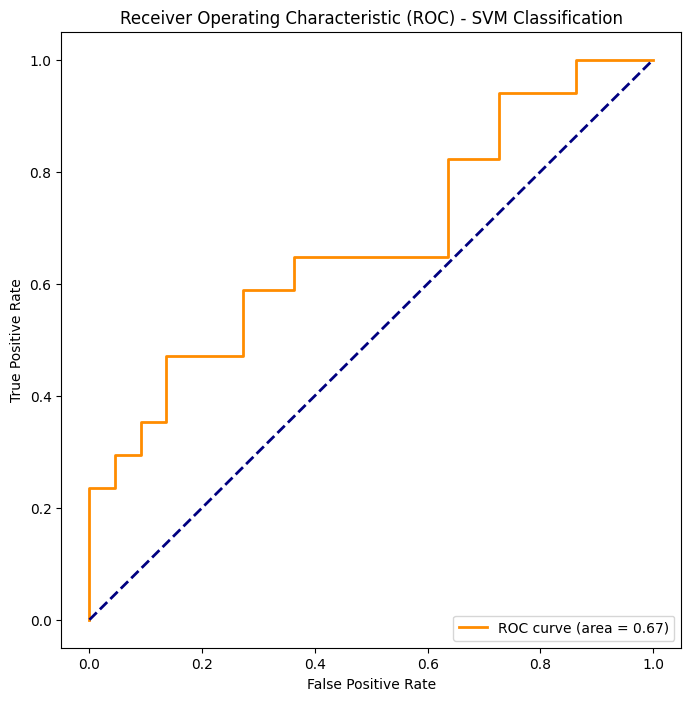

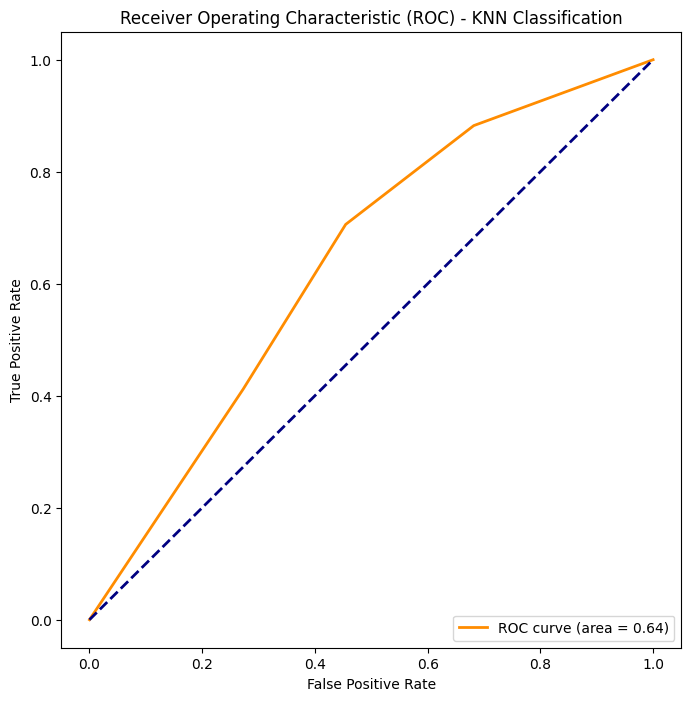

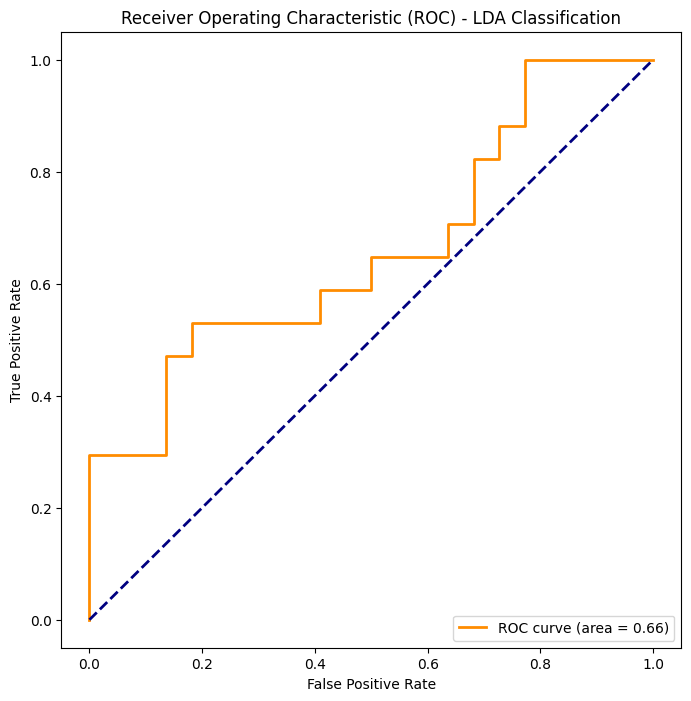

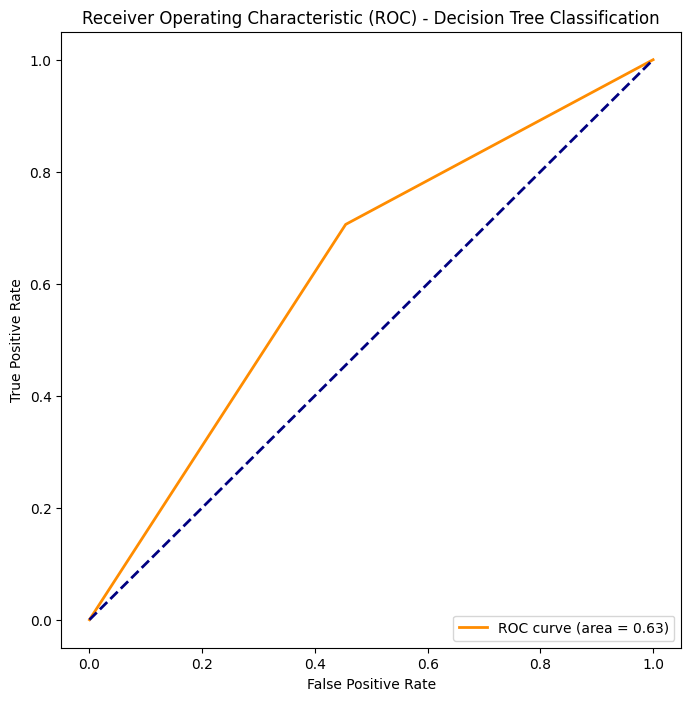

In [ ]:
clasification = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
d_svm = clasification.svm()
d_knn = clasification.knn()
d_lda = clasification.lda()
d_dt = clasification.decision_tree()

In [ ]:
# ridge_svm = Saver(d_svm,'Ridge','svm')
# ridge_svm.save()

# ridge_knn = Saver(d_knn,'Ridge','knn')
# ridge_knn.save()

# ridge_lda = Saver(d_lda,'Ridge','lda')
# ridge_lda.save()

# ridge_dt = Saver(d_dt,'Ridge','dt')
# ridge_dt.save()

In [ ]:
# have instances of Classifier class named svm, knn, lda, decision_tree
svm = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
knn = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
lda = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)
decision_tree = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)

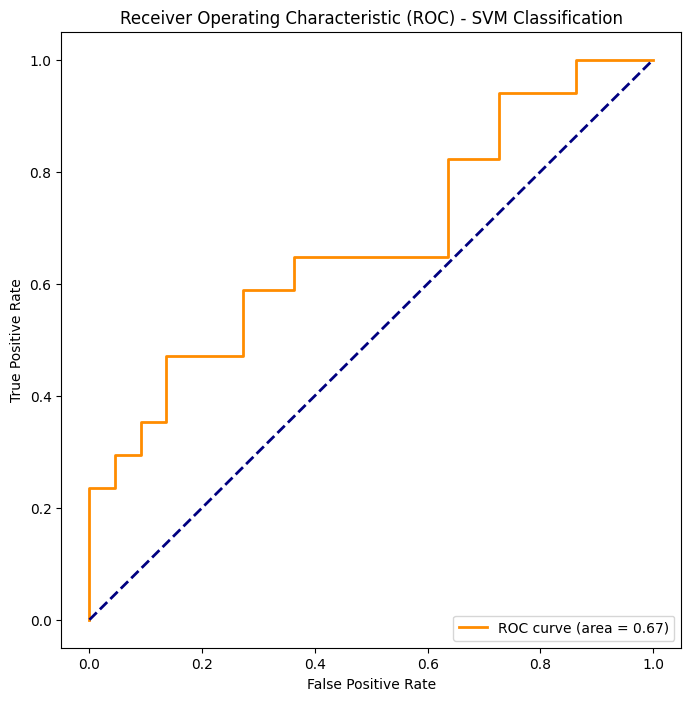

Results saved to /content/drive/MyDrive/Datasets/Results/svm_ridge.xlsx


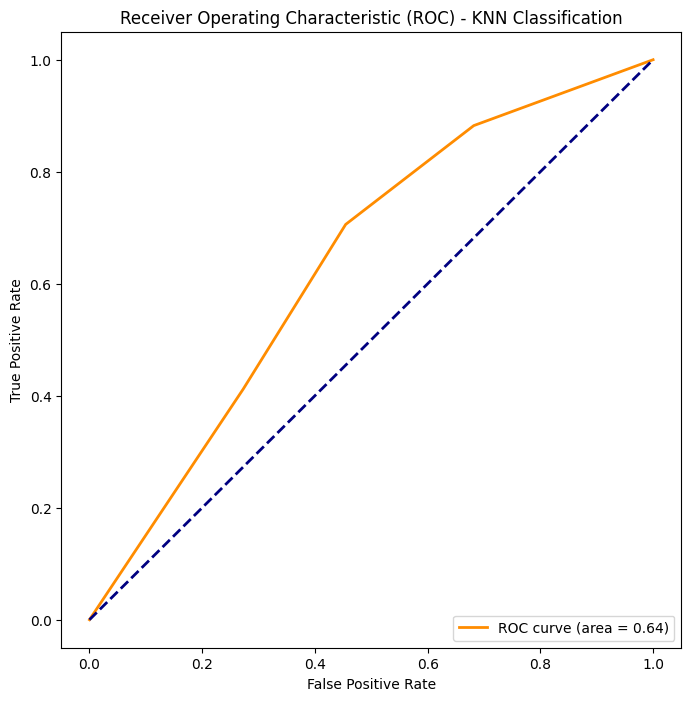

Results saved to /content/drive/MyDrive/Datasets/Results/knn_ridge.xlsx


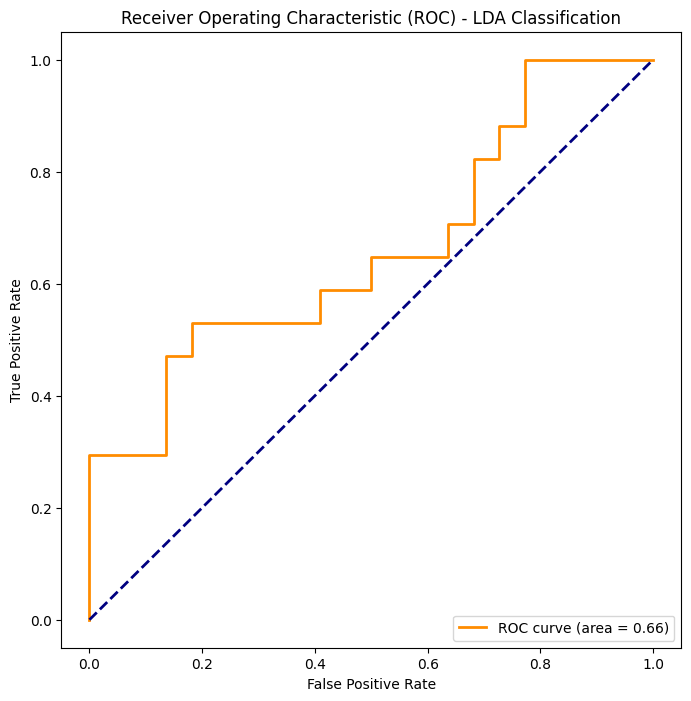

Results saved to /content/drive/MyDrive/Datasets/Results/lda_ridge.xlsx


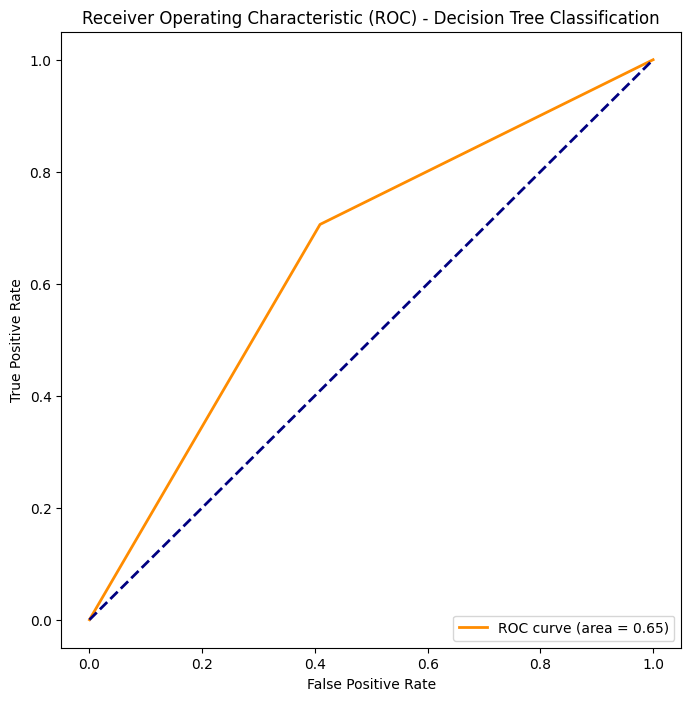

Results saved to /content/drive/MyDrive/Datasets/Results/dt_ridge.xlsx


In [ ]:
# Ridge regularizer
ridge_svm = Saver(svm.svm(), 'Ridge', 'SVM', '/content/drive/MyDrive/Datasets/Results/svm_ridge.xlsx')

ridge_svm.save()

ridge_knn = Saver(knn.knn(), 'Ridge', 'KNN', '/content/drive/MyDrive/Datasets/Results/knn_ridge.xlsx')
ridge_knn.save()

ridge_lda = Saver(lda.lda(), 'Ridge', 'LDA', '/content/drive/MyDrive/Datasets/Results/lda_ridge.xlsx')
ridge_lda.save()

ridge_dt = Saver(decision_tree.decision_tree(), 'Ridge', 'Decision Tree', '/content/drive/MyDrive/Datasets/Results/dt_ridge.xlsx')
ridge_dt.save()

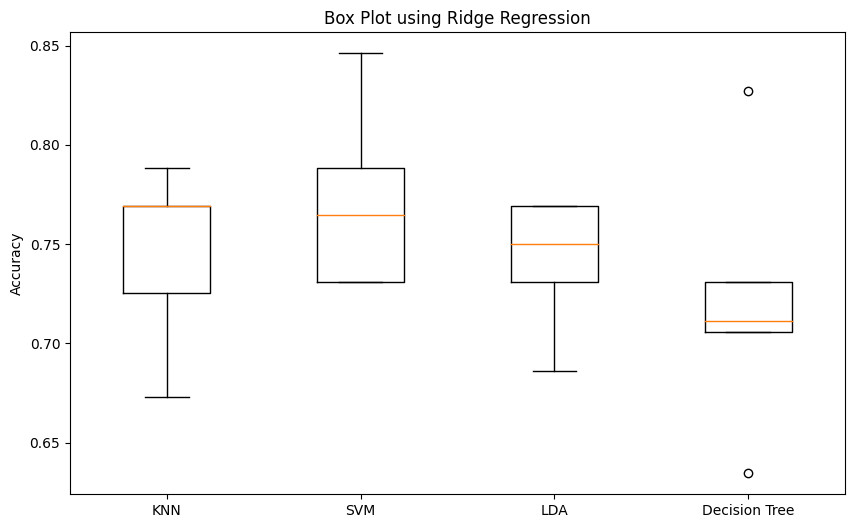

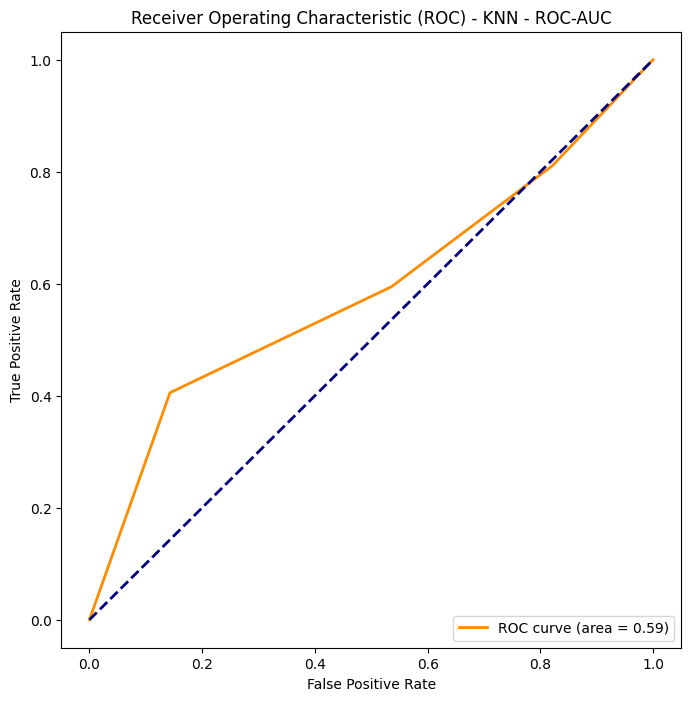

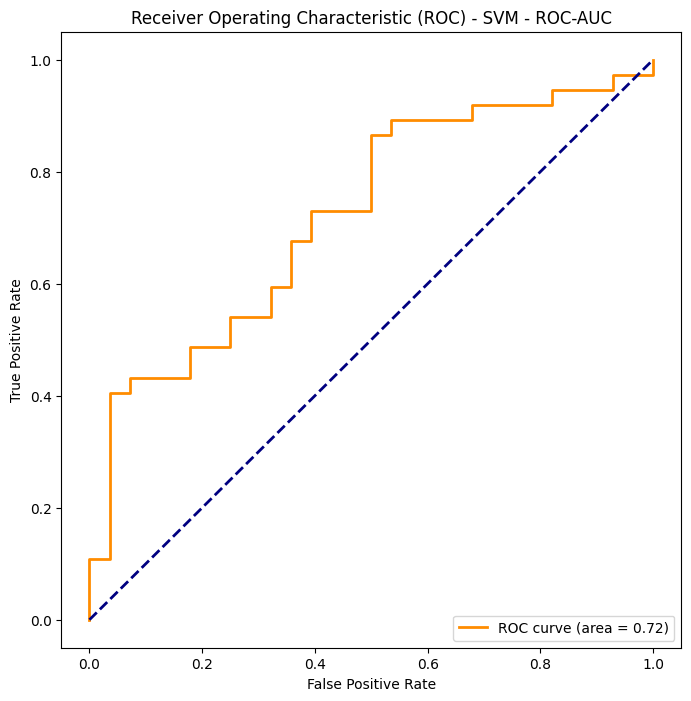

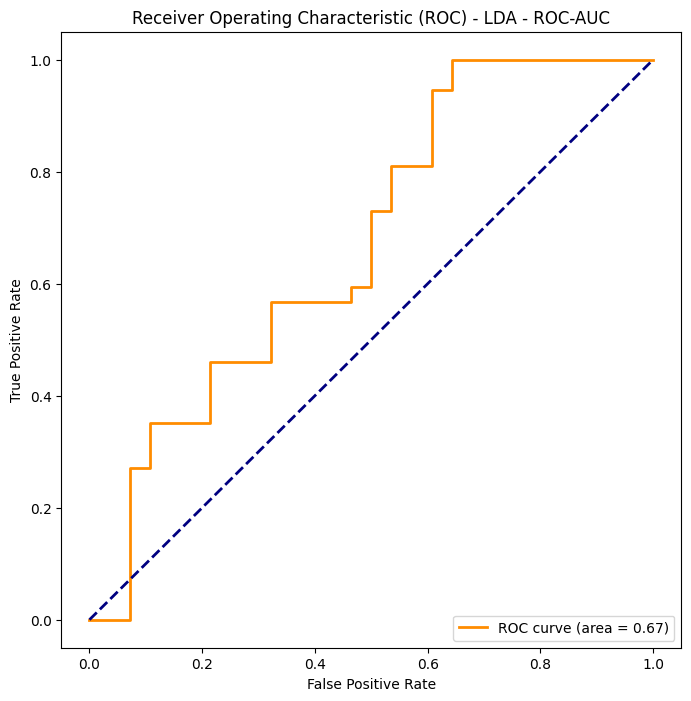

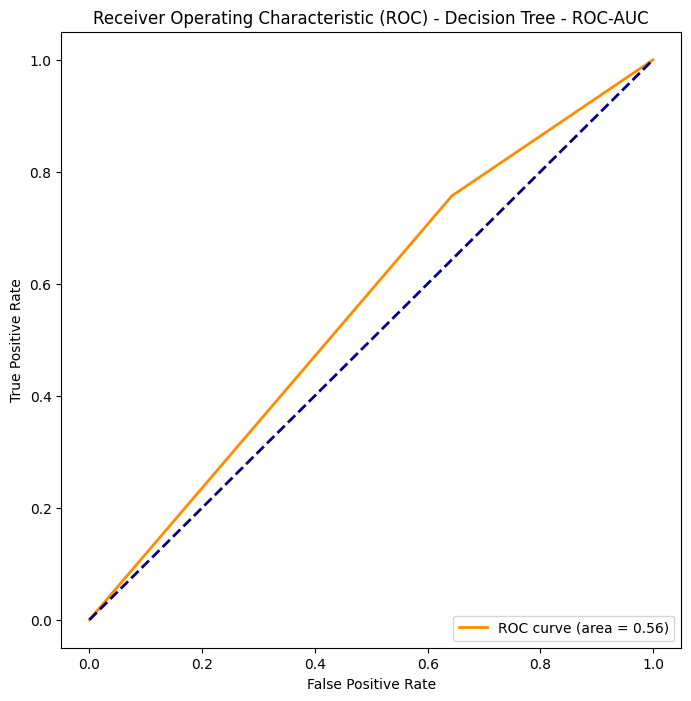

TypeError: ignored

In [ ]:
# Example usage:
# Assuming X_train, X_test, y_train, y_test are your features and target variable, respectively
clf = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)

models_to_cross_validate = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(probability=True)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Perform cross-validation and get scores
cross_val_scores = clf.cross_validate_models(train_feature_lasso, y_train, models_to_cross_validate)


# Create a box plot of the cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot(cross_val_scores.values, labels=cross_val_scores.keys())
plt.title('Box Plot using Ridge Regression')
plt.ylabel('Accuracy')
plt.show()

# ROC-AUC plot for each model
for model_name, model in models_to_cross_validate:
    probabilities = model.fit(clf.X_train, clf.y_train).predict_proba(clf.X_test)[:, 1]
    clf.plot_roc_auc(model, probabilities, title_suffix=f'{model_name} - ROC-AUC')



cross_val_scores = clf.cross_validate_models(models_to_cross_validate)
# Radar plot for each model
plt.figure(figsize=(12, 8))
for model_name, model in models_to_cross_validate:
    results_dict = clf.cross_validate_models([(model_name, model)])
    print(f"Type of results_dict for {model_name}: {type(results_dict)}")
    print(f"Content of results_dict for {model_name}: {results_dict}")
    clf.plot_radar(results_dict, title_suffix=f'{model_name} - Radar')

# Scatter plot for each model
for model_name, model in models_to_cross_validate:
    results_dict = clf.cross_validate_models([(model_name, model)])[model_name]
    clf.plot_scatter(results_dict, title_suffix=f'{model_name} - Scatter')

plt.tight_layout()
plt.show()

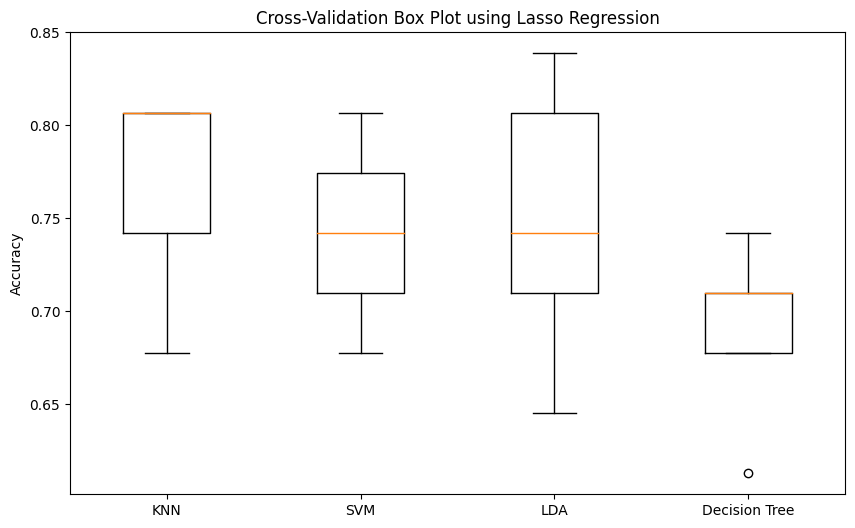

In [ ]:
# Assuming X and y are your features and target variable, respectively
clf = Classifier(train_feature_ridge,test_feature_ridge,y_train, y_test)

models_to_cross_validate = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(probability=True)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Perform cross-validation and get scores
cross_val_scores = clf.cross_validate_models(train_feature_lasso, y_train, models_to_cross_validate)

# Create a box plot of the cross-validation scores

plt.figure(figsize=(10, 6))
plt.boxplot(cross_val_scores.values, labels=cross_val_scores.keys())
plt.title('Cross-Validation Box Plot using Lasso Regression')
plt.ylabel('Accuracy')
plt.show()

# Partial Least Square(PLS)

In [19]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
print(type(X_train_scaled))
print(type(X_test_scaled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [20]:
# n_components=components


In [21]:
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.351117,-0.211879,-0.439349,-0.527439,-0.285050,-0.423848,-0.364391,-0.115336,-0.487176,-0.351489,...,-0.525627,-0.498711,0.284182,-0.374997,-0.248166,-0.623399,-0.575401,-0.455123,-0.633156,-0.208433
1,-0.351117,-0.384940,-0.439349,-0.286722,-0.285050,-0.423848,-0.336911,-0.330188,-0.487176,-0.351489,...,-0.301163,-0.498711,-0.628417,-0.451622,0.063093,0.032944,-0.575401,-0.455123,-0.613630,-0.390125
2,-0.351117,-0.384940,-0.439349,-0.407081,-0.285050,-0.423848,-0.475298,-0.330188,-0.487176,-0.351489,...,-0.413395,-0.498711,-0.628417,-0.451622,-0.403795,-0.492130,-0.575401,-0.455123,-0.635966,-0.390125
3,-0.039147,-0.384940,-0.439349,-0.407081,-0.285050,-0.423848,-0.413109,-0.330188,-0.487176,-0.351489,...,-0.413395,-0.498711,0.040612,-0.451622,-0.559424,0.426749,-0.575401,-0.455123,-0.621879,-0.390125
4,-0.195132,-0.228188,0.129858,-0.166364,-0.285050,0.060870,-0.315439,-0.097382,0.731912,-0.108140,...,-0.188931,-0.357261,1.208036,-0.371980,0.996869,-0.229593,-0.139270,-0.278348,-0.615353,-0.240256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2.924572,3.090792,1.497987,5.851555,5.992127,7.374835,3.626600,1.453257,2.533784,1.831548,...,5.983830,6.604618,0.502089,5.079999,0.218722,0.951823,5.940594,5.340661,2.900759,3.351704
255,0.740779,-0.384940,-0.439349,-0.407081,-0.285050,-0.423848,-0.475298,-0.330188,-0.487176,-0.351489,...,-0.413395,-0.498711,-0.628417,-0.451622,-0.559424,-0.623399,-0.575401,-0.455123,-0.635966,-0.390125
256,-0.351117,-0.384940,-0.439349,-0.407081,-0.285050,-0.423848,-0.475298,-0.330188,-0.487176,-0.351489,...,-0.413395,-0.498711,-0.628417,-0.451622,-0.559424,-0.754667,-0.575401,-0.455123,-0.635966,-0.390125
257,-0.351117,-0.384940,-0.439349,-0.407081,-0.285050,-0.423848,-0.435577,-0.330188,-0.487176,-0.351489,...,-0.413395,-0.498711,-0.628417,-0.451622,-0.170351,0.164212,-0.575401,-0.455123,-0.630237,-0.390125


In [22]:
#PLS
pls_model = Regularizer(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled)
feature_weights = pls_model.pls()

# train_feature_pls = X_train_scaled * feature_weights.T
# test_feature_pls = X_test_scaled * feature_weights.T
df = pd.DataFrame(feature_weights)
feature_weights=df


#df = train_feature_pls.dropna(how='any',axis=0)
#df

feature_weights

,0,1,2,3,4,5,6
0,0.109498,-0.099824,-0.262303,0.046548,-0.072065,0.101255,0.063114
1,0.122788,-0.140797,0.141817,-0.141253,-0.033955,0.061427,-0.028240
2,0.127908,0.193831,0.139397,-0.025378,-0.234427,-0.124997,-0.001177
3,0.133692,-0.155703,0.086145,0.188687,0.160351,-0.144129,0.013824
4,0.039384,-0.133257,0.121732,-0.095335,0.003990,-0.030527,-0.027609
...,...,...,...,...,...,...,...
56,0.148601,0.215198,0.073774,-0.003856,-0.225767,0.217451,-0.202122
57,0.170209,0.037228,0.135419,0.062566,-0.039318,-0.203931,-0.104512
58,0.150114,-0.111693,0.011340,-0.005065,0.076850,-0.081504,0.008431
59,0.166898,0.079360,-0.112828,0.107640,0.141620,-0.165223,-0.138373


In [11]:
print(type(feature_weights))

<class 'pandas.core.frame.DataFrame'>


In [12]:
train_feature_pls = X_train_scaled * feature_weights
test_feature_pls = X_test_scaled * feature_weights
print(type(train_feature_pls))
train_feature_pls
test_feature_pls

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.081114,0.038426,0.035294,-0.013346,0.020542,-0.042917,-0.020851,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.023960,-0.025322,0.133287,-0.418525,0.009679,0.003739,-0.037122,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.044911,-0.047918,-0.061244,0.007276,0.066823,-0.008208,0.000081,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.036474,-0.057066,0.052156,-0.008681,-0.045708,0.061089,-0.002508,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.013828,0.008996,-0.053483,0.027335,-0.001137,0.012939,0.010716,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.033986,-0.111998,-0.053842,-0.052094,0.013632,0.004924,-0.005267,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
from sklearn.impute import SimpleImputer

# Assuming X is your input data
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
X_imputed = imputer.fit_transform(train_feature_pls)
X_test_imputed=imputer.fit_transform(test_feature_pls)
print(type(X_imputed))

train_feature_pls = pd.DataFrame(X_imputed)
test_feature_pls = pd.DataFrame(X_test_imputed)
print(type(train_feature_pls))
print(type(test_feature_pls))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [14]:
# clasification = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
# d_svm =Classification.svm()
# d_knn = clasification.knn()
# d_lda = clasification.lda()
# d_dt = clasification.decision_tree()

# have instances of Classifier class named svm, knn, lda, decision_tree
svm = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
knn = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
lda = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
decision_tree = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)
svm
lda

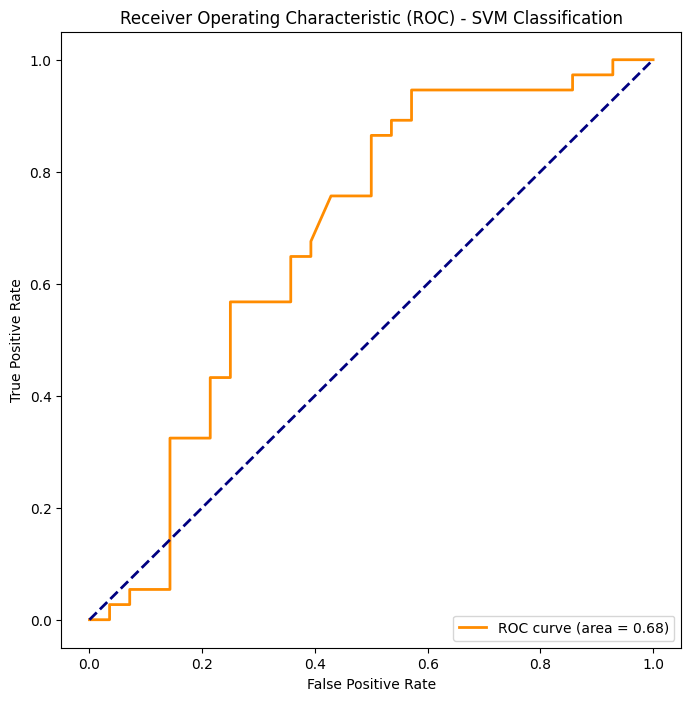

Results saved to /content/drive/MyDrive/Datasets/Results/svm_pls.xlsx


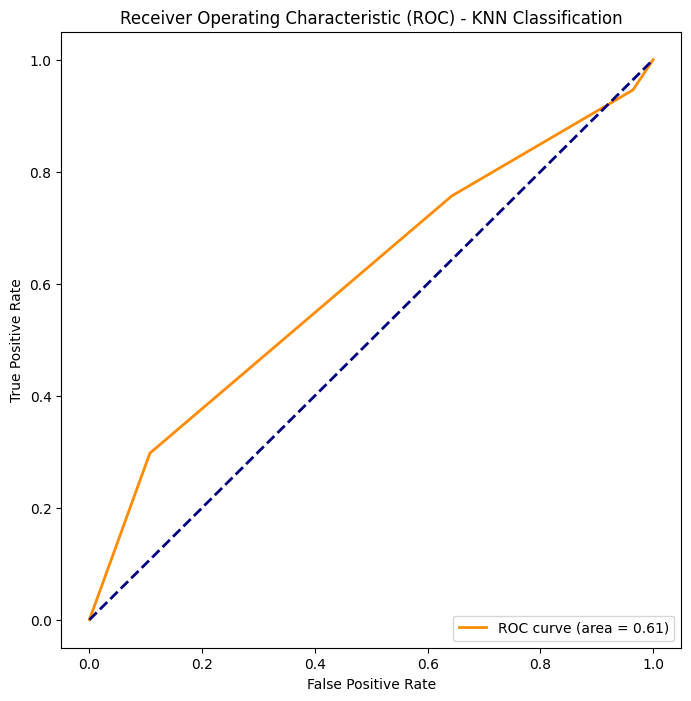

Results saved to /content/drive/MyDrive/Datasets/Results/knn_pls.xlsx


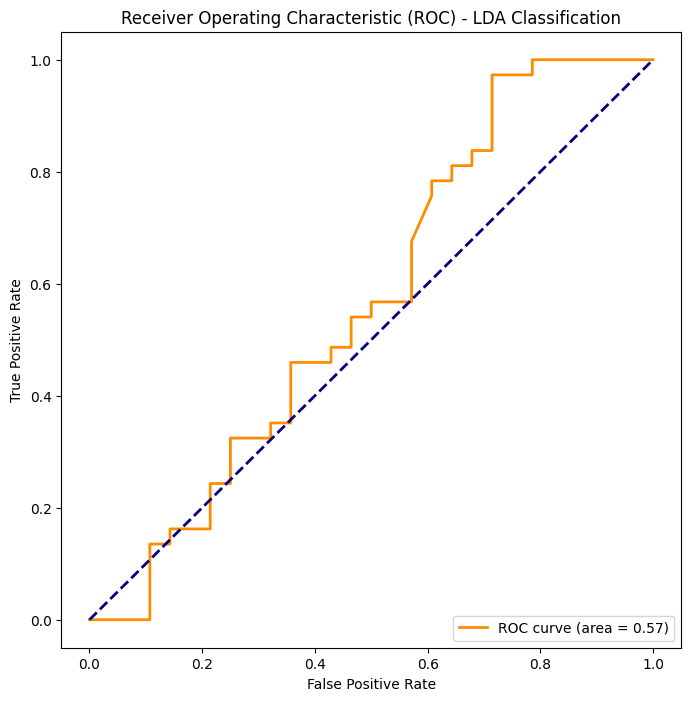

Results saved to /content/drive/MyDrive/Datasets/Results/lda_pls.xlsx


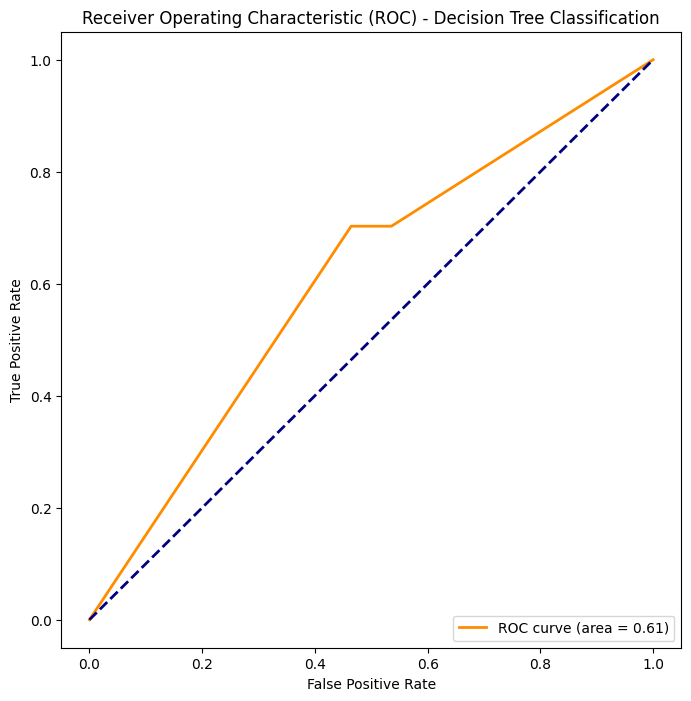

Results saved to /content/drive/MyDrive/Datasets/Results/dt_pls.xlsx


In [15]:
# PLS regularizer
pls_svm = Saver(svm.svm(), 'PLS', 'SVM', '/content/drive/MyDrive/Datasets/Results/svm_pls.xlsx')
pls_svm.save()

pls_knn = Saver(knn.knn(), 'PLS', 'KNN', '/content/drive/MyDrive/Datasets/Results/knn_pls.xlsx')
pls_knn.save()

pls_lda = Saver(lda.lda(), 'PLS', 'LDA', '/content/drive/MyDrive/Datasets/Results/lda_pls.xlsx')
pls_lda.save()

pls_dt = Saver(decision_tree.decision_tree(), 'PLS', 'Decision Tree', '/content/drive/MyDrive/Datasets/Results/dt_pls.xlsx')
pls_dt.save()

# C:\\Users\\iit\\Downloads\\

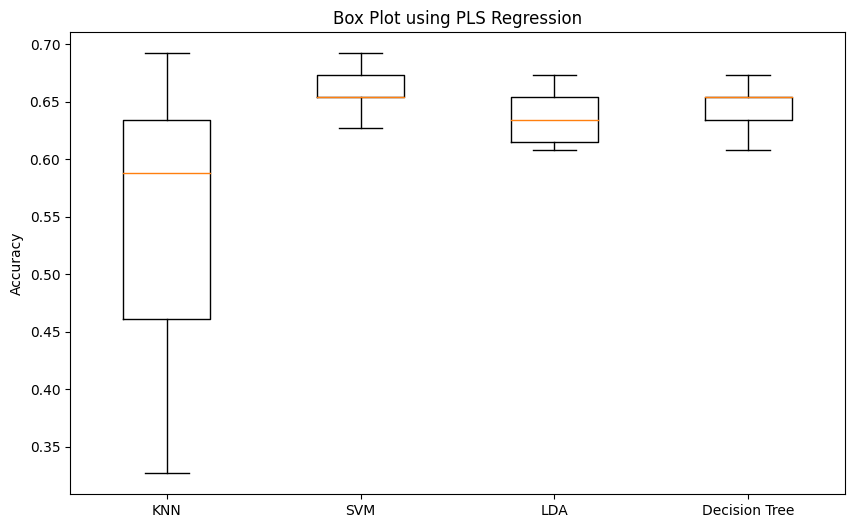

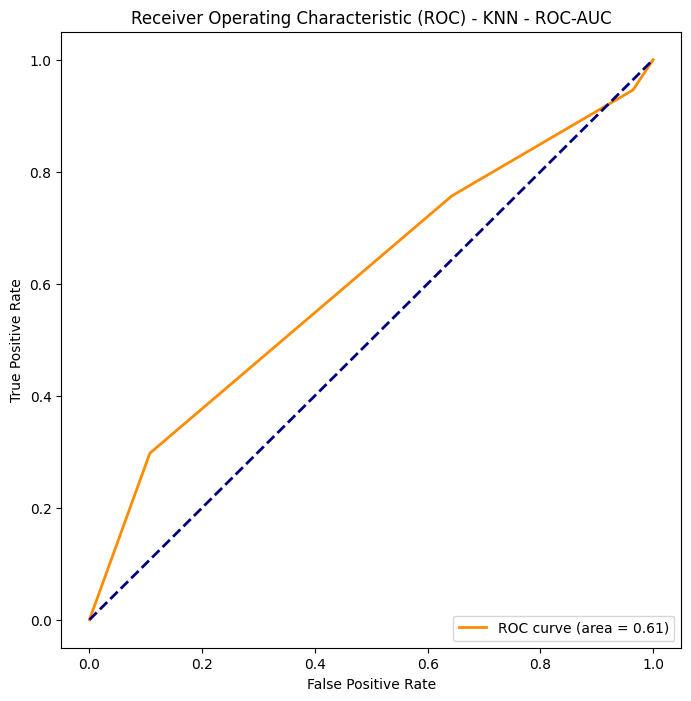

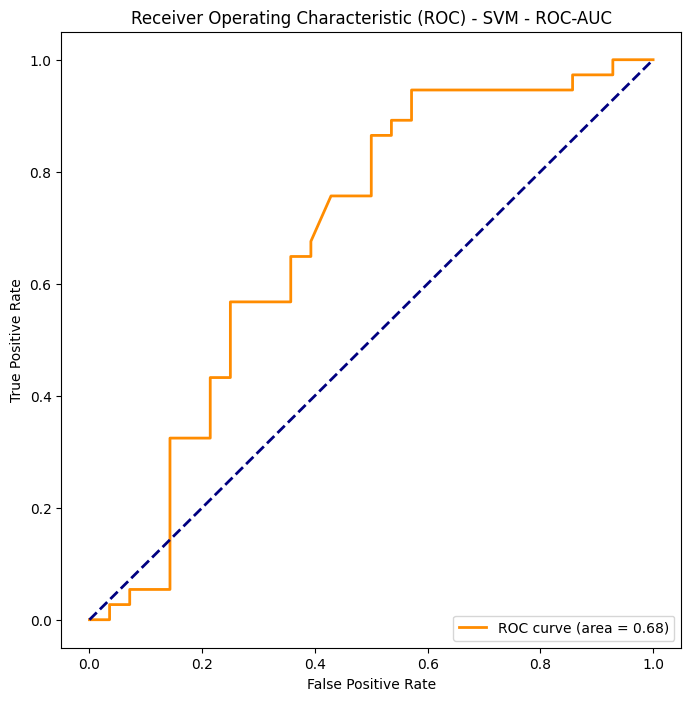

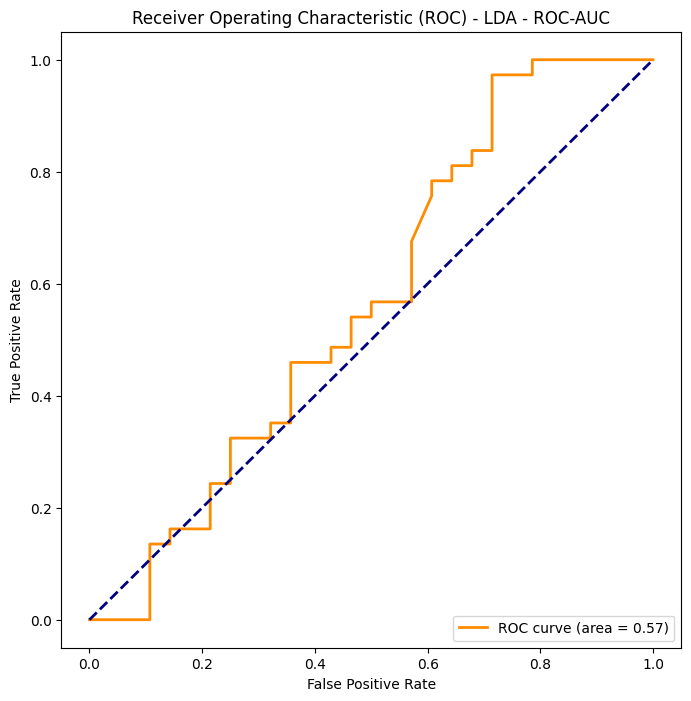

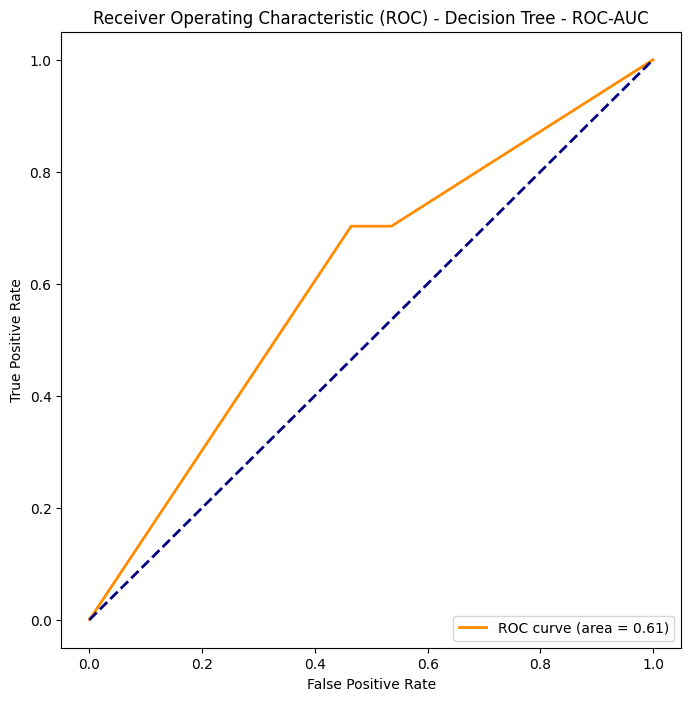

In [18]:
# Example usage:
# Assuming X_train, X_test, y_train, y_test are your features and target variable, respectively
clf = Classifier(train_feature_pls,test_feature_pls,y_train,y_test)

models_to_cross_validate = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(probability=True)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Perform cross-validation and get scores
cross_val_scores = clf.cross_validate_models(train_feature_pls, y_train, models_to_cross_validate)


# Create a box plot of the cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot(cross_val_scores.values, labels=cross_val_scores.keys())
plt.title('Box Plot using PLS Regression')
plt.ylabel('Accuracy')
plt.show()

# ROC-AUC plot for each model
for model_name, model in models_to_cross_validate:
    probabilities = model.fit(clf.X_train, clf.y_train).predict_proba(clf.X_test)[:, 1]
    clf.plot_roc_auc(model, probabilities, title_suffix=f'{model_name} - ROC-AUC')



cross_val_scores = clf.cross_validate_models(train_feature_pls, y_train, models=models_to_cross_validate)

# # Radar plot for each model
# plt.figure(figsize=(12, 8))
# for model_name, model in models_to_cross_validate:
#     results_dict = clf.cross_validate_models([(model_name, model)])
#     print(f"Type of results_dict for {model_name}: {type(results_dict)}")
#     print(f"Content of results_dict for {model_name}: {results_dict}")
#     clf.plot_radar(results_dict, title_suffix=f'{model_name} - Radar')

# # Scatter plot for each model
# for model_name, model in models_to_cross_validate:
#     results_dict = clf.cross_validate_models([(model_name, model)])[model_name]
#     clf.plot_scatter(results_dict, title_suffix=f'{model_name} - Scatter')

# plt.tight_layout()
# plt.show()

# Mutual Information

In [23]:
#Mutual Information
#path="/content/drive/MyDrive/Datasets/ReLink/Apache.csv"
path="/content/drive/MyDrive/Datasets/ReLink/Apache.csv"

new_obj = DataPreprocessing(path)
x,y = new_obj.read_data()

print(type(x))
print(type(y))
# x=x.to_numpy()
# print(type(x))
y
x

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,12,11,14,4,82,5,61,7,2195,165,...,178,738,51,51,56,0.28,221,197,246,81
1,0,0,0,0,0,0,0,0,644,1,...,0,0,0,0,0,0.00,0,0,0,0
2,8,7,9,4,54,4,49,1,1945,209,...,172,877,45,26,45,0.04,256,217,277,128
3,5,5,6,2,37,5,27,5,1159,171,...,112,414,25,25,30,0.32,134,122,146,63
4,2,2,2,1,21,1,9,3,166,15,...,10,20,4,5,4,0.73,9,10,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,5,5,6,3,35,3,26,7,1072,126,...,107,321,18,18,22,0.46,122,122,148,79
190,0,0,0,0,0,0,0,0,697,1,...,0,0,0,0,0,0.00,0,0,0,0
191,17,13,21,8,100,7,83,3,375,34,...,35,161,46,33,56,0.16,51,38,62,25
192,5,5,6,2,42,3,29,8,2136,224,...,341,621,29,29,34,0.36,205,191,229,89


In [24]:
pip install feature_engine

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder

In [26]:
# path="/content/drive/MyDrive/Datasets/ReLink/Apache.csv"
# data_preprocessor = DataPreprocessing(path)
discretized_data = DataPreprocessing.discretize(x, n_bins=5, strategy='uniform')
print(discretized_data)
print(type(discretized_data))


      0    1    2    3    4    5    6    7    8    9   ...   16   17   18  \
0    1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  2.0  0.0  ...  2.0  1.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  ...  2.0  2.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  1.0  1.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
189  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
190  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
191  1.0  2.0  2.0  1.0  0.0  0.0  2.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
192  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  1.0  ...  4.0  1.0  0.0   
193  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      19   20   21   22   23   24   25  
0    1.0  0.0  0.0  1.0  1.0  1.0 

In [47]:
#discretized_data = DataPreprocessing.discretize(x, n_bins=5, strategy='uniform')
X_train, X_test, y_train, y_test = new_obj.split(discretized_data,y)
X_train_scaled,X_test_scaled = new_obj.standardization(X_train,X_test)
mi_model = Regularizer(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled)

mi = mi_model.mutual_information()
#MI is an Numpy array,Convert the NumPy array to a Pandas Series
mi_series = pd.Series(mi, index=X_train.columns)
mi = mi_series
# threshold = 0.1

# # Select features with mutual information scores above the threshold
# selected_features = X_train.columns[mi > threshold]

[[-0.33195307 -0.48474059 -0.40951666 ... -0.47974861 -0.39890517
  -0.33547974]
 [-0.33195307  1.3478153  -0.40951666 ... -0.47974861 -0.39890517
  -0.33547974]
 [-0.33195307 -0.48474059 -0.40951666 ... -0.47974861 -0.39890517
  -0.33547974]
 ...
 [-0.33195307 -0.48474059 -0.40951666 ... -0.47974861 -0.39890517
  -0.33547974]
 [-0.33195307 -0.48474059 -0.40951666 ... -0.47974861 -0.39890517
  -0.33547974]
 [-0.33195307  1.3478153  -0.40951666 ... -0.47974861 -0.39890517
  -0.33547974]]
[[-0.33195307 -0.48474059 -0.40951666 ...  0.80233819 -0.39890517
  -0.33547974]
 [-0.33195307 -0.48474059 -0.40951666 ... -0.47974861 -0.39890517
  -0.33547974]
 [-0.33195307 -0.48474059 -0.40951666 ... -0.47974861 -0.39890517
  -0.33547974]
 ...
 [ 4.81331944  5.0129271   3.55767602 ... -0.47974861 -0.39890517
  -0.33547974]
 [-0.33195307 -0.48474059 -0.40951666 ...  0.80233819  1.10915095
   1.52164024]
 [-0.33195307  1.3478153  -0.40951666 ...  0.80233819 -0.39890517
  -0.33547974]]


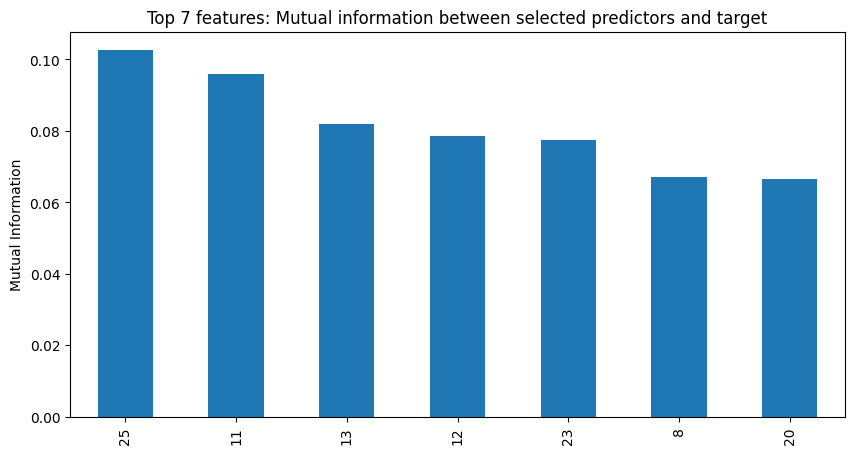

In [52]:
# Sort mutual information scores in descending order
mi_sorted = mi.sort_values(ascending=False)

# Select the top 'components' features
# components = 7  # Set to your desired number of components
selected_features = mi_sorted.head(components).index

# Assuming X is  input features and y is  target variable
X_selected_train = X_train[selected_features]
X_selected_test=X_test[selected_features]


##Plot the sorted mutual information scores for selected features
mi_sorted[selected_features].plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title(f"Top {components} features: Mutual information between selected predictors and target")
plt.show()


# Plot the sorted mutual information scores
# mi_sorted.plot.bar(figsize=(10, 5))
# plt.ylabel('Mutual Information')
# plt.title("Mutual information between predictors and target")
# plt.show()

In [55]:
mi.ndim

1

In [56]:
X_selected_train

,25,11,13,12,23,8,20
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
106,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
print(type(mi))

<class 'pandas.core.series.Series'>


In [58]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Mutual information between predictors and target')

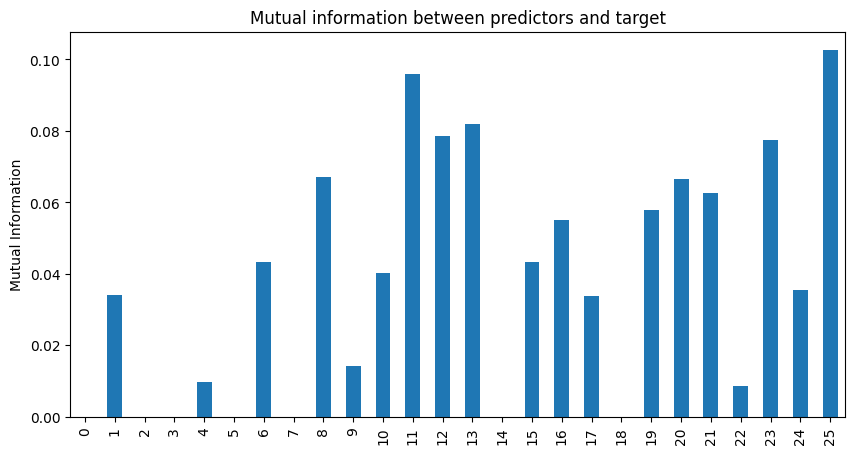

In [70]:
mi = pd.Series(mi)
mi.plot.bar(figsize=(10, 5))
# mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

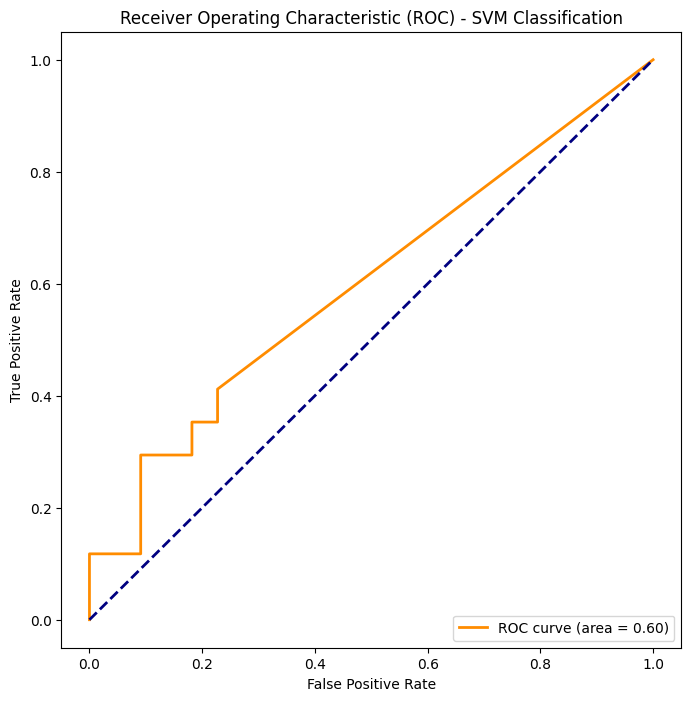

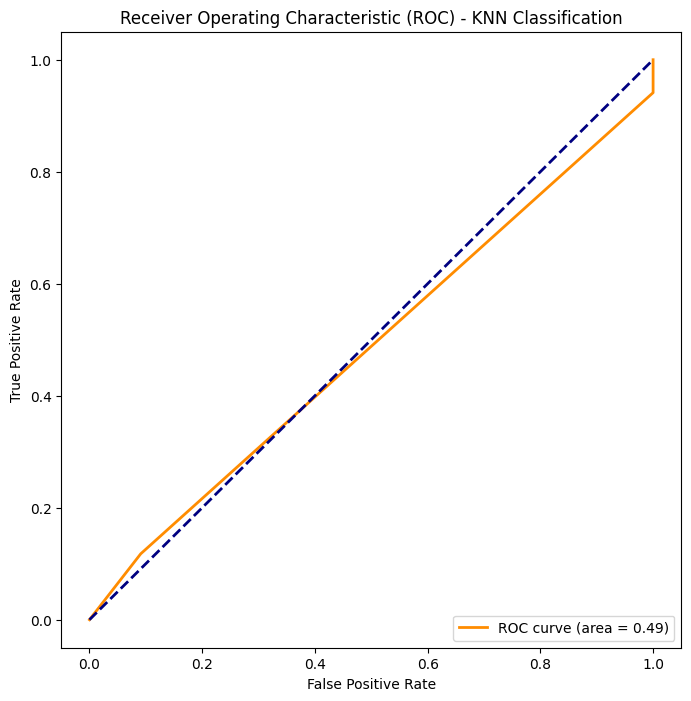

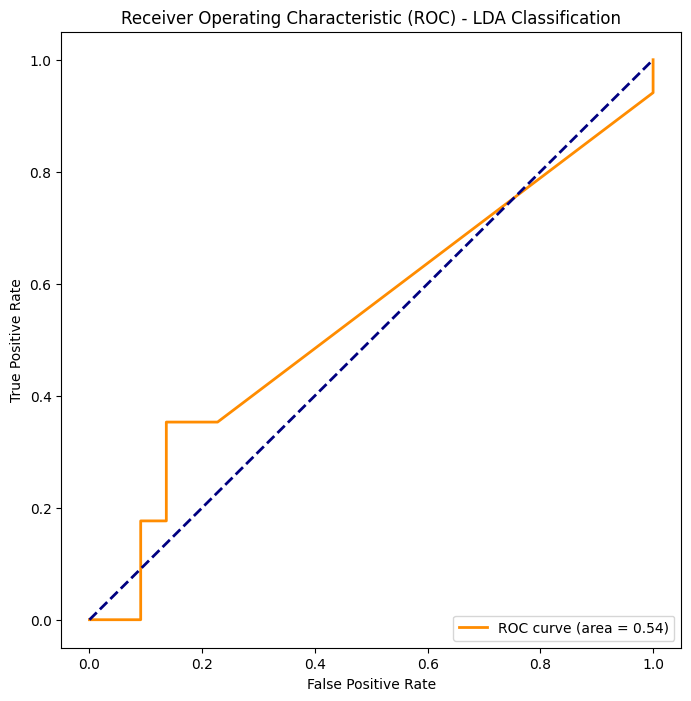

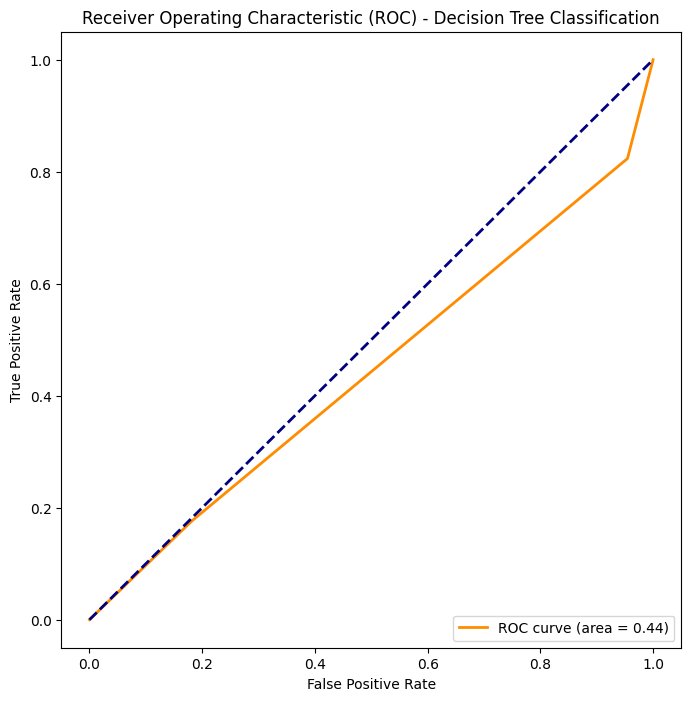

NameError: ignored

In [60]:
clasification = Classifier(X_selected_train,X_selected_test,y_train,y_test)
d_svm = clasification.svm()
d_knn = clasification.knn()
d_lda = clasification.lda()
d_dt = clasification.decision_tree()

# MI regularizer
mi_knn = Saver(knn.knn(), 'MI', 'KNN', '/content/drive/MyDrive/Datasets/Results/knn_mi.xlsx')
mi_knn.save()

mi_lda = Saver(lda.lda(), 'MI', 'LDA', '/content/drive/MyDrive/Datasets/Results/lda_mi.xlsx')
mi_lda.save()

mi_dt = Saver(decision_tree.decision_tree(), 'MI', 'Decision Tree', '/content/drive/MyDrive/Datasets/Results/dt_mi.xlsx')
mi_dt.save()

svm_dt = Saver(svm.svm(), 'MI', 'SVM', '/content/drive/MyDrive/Datasets/Results/svm_mi.xlsx')
svm_dt.save()



In [ ]:
print(type(X_selected_train))

<class 'pandas.core.frame.DataFrame'>


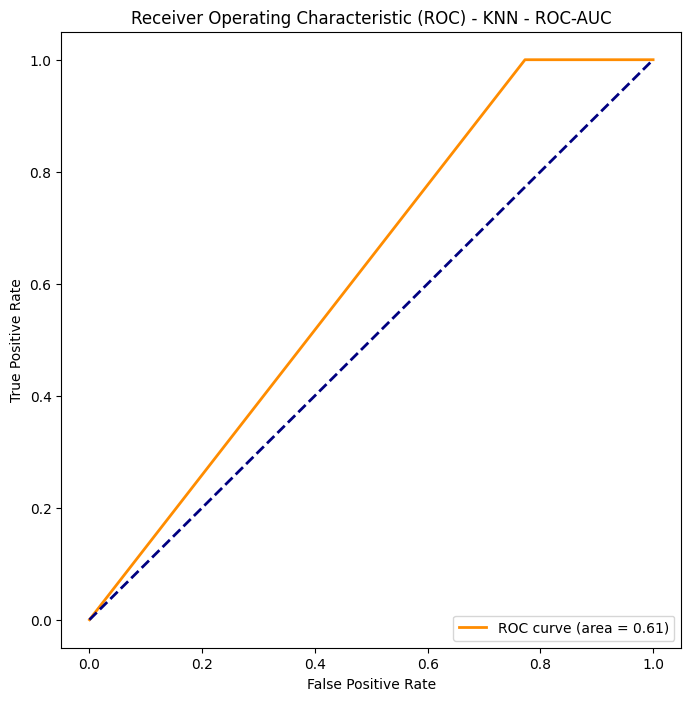

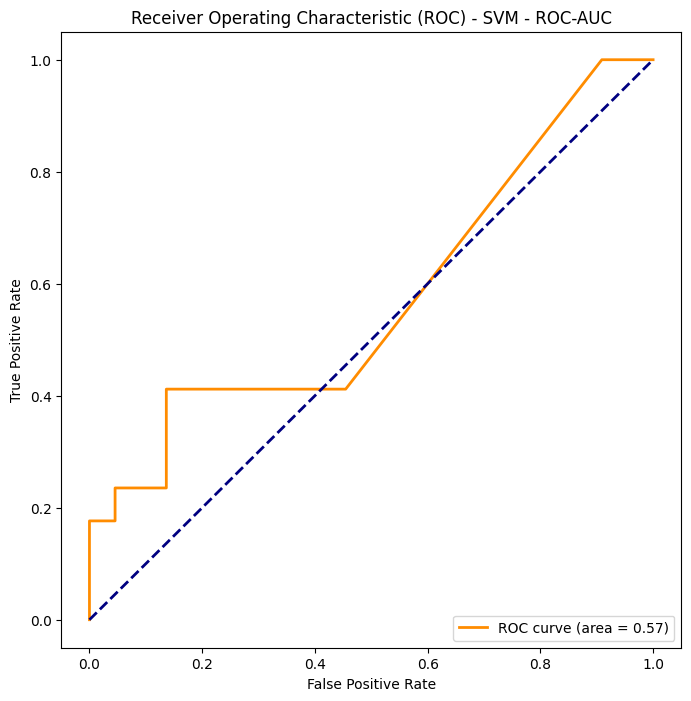

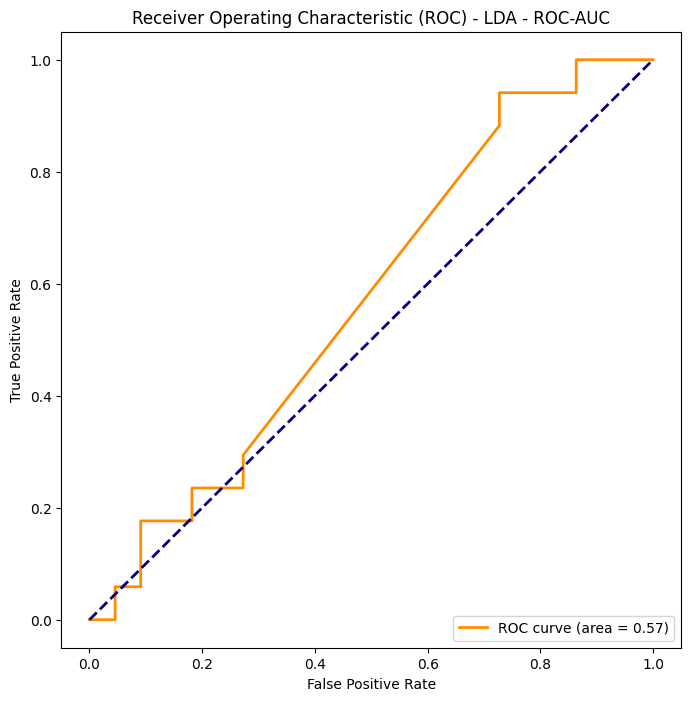

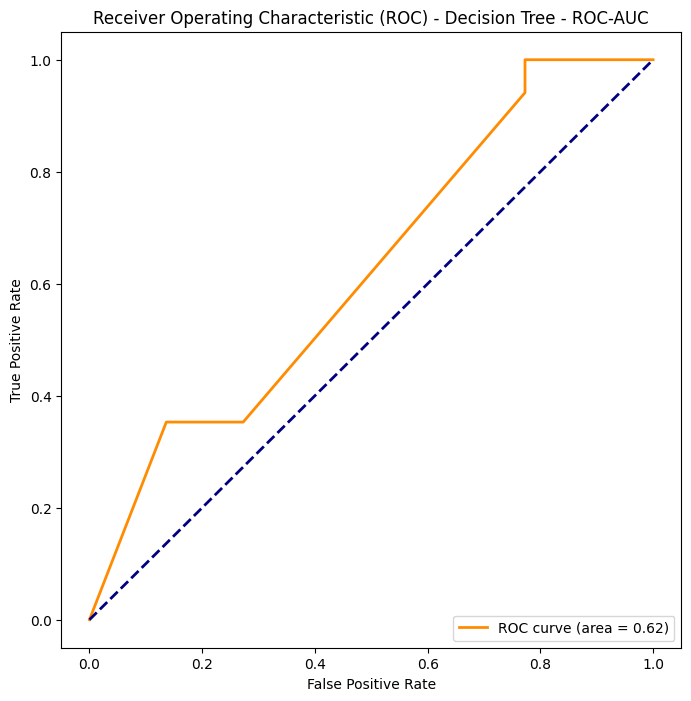

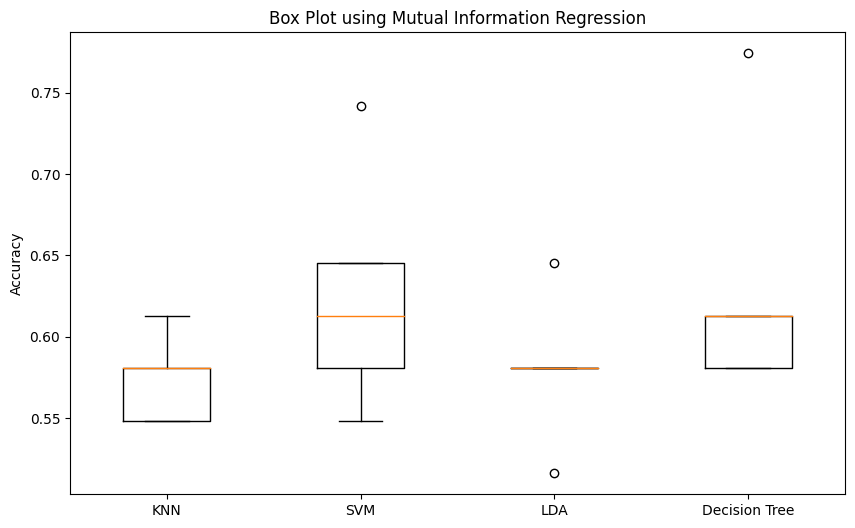

TypeError: ignored

In [ ]:
import numpy as np

# Assuming X_selected_train and X_selected_test are your features, and y_train and y_test are your target variables

# Create the classifier instance
clf = Classifier(X_selected_train, X_selected_test, y_train, y_test)

# Define models to include in cross-validation
models_to_cross_validate = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVM', SVC(probability=True)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Perform cross-validation and get scores
cross_val_scores = clf.cross_validate_models(X_selected_train, y_train, models=models_to_cross_validate)
cross_val_scores_=pd.DataFrame(cross_val_scores)
cross_val_scores=cross_val_scores_

# ROC-AUC plot for each model
for model_name, model in models_to_cross_validate:
    probabilities = model.fit(X_selected_train, y_train).predict_proba(X_selected_test)[:, 1]
    clf.plot_roc_auc(model, probabilities, title_suffix=f'{model_name} - ROC-AUC')

# Create a box plot of the cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot(cross_val_scores.values, labels=cross_val_scores.columns)
plt.title('Box Plot using Mutual Information Regression')
plt.ylabel('Accuracy')
plt.show()

# Radar plot for each model
def plot_radar(self, results_dict, title_suffix=""):
    categories = list(results_dict.index)
    values = results_dict.values.flatten()

    num_axes = len(categories)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_axes, endpoint=False).tolist()

    # The plot is circular, so we need to "complete the loop" and append the start item at the end
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]

    # Create radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='red', alpha=0.25, label='Accuracy')
    ax.set_title(f'Radar Plot - {title_suffix}')
    ax.set_yticklabels([])

    plt.show()

# Scatter plot for each model
for model_name, model in models_to_cross_validate:
    results_dict = clf.cross_validate_models(X_selected_train, y_train, [(model_name, model)])[model_name]
    clf.plot_scatter(results_dict, title_suffix=f'{model_name} - Scatter')

plt.tight_layout()
plt.show()


# **PLOTTERS**

In [ ]:
# Assuming you have instances of your Classifier class named knn, lda, decision_tree
knn = Classifier(X_train, X_test, y_train, y_test)
lda = Classifier(X_train, X_test, y_train, y_test)
decision_tree = Classifier(X_train, X_test, y_train, y_test)

# Function to save models with different regularizers
def save_model_with_regularizer(classifier, reg_type, model_name, file_suffix):
    # base_path = 'C:\\Users\\iit\\Downloads\\'
    base_path = '/content/drive/MyDrive/Datasets/Results/'
    saver = Saver(classifier(), reg_type, model_name, base_path + file_suffix)
    saver.save()

# Lasso regularizer
save_model_with_regularizer(svm.svm, 'Lasso', 'SVM', 'svm_regularizers.xlsx')
save_model_with_regularizer(knn.knn, 'Lasso', 'KNN', 'knn_regularizers.xlsx')
save_model_with_regularizer(lda.lda, 'Lasso', 'LDA', 'lda_regularizers.xlsx')
save_model_with_regularizer(decision_tree.decision_tree, 'Lasso', 'Decision Tree', 'dt_regularizers.xlsx')

# Ridge regularizer
save_model_with_regularizer(svm.svm, 'Ridge', 'SVM', 'svm_regularizers.xlsx')
save_model_with_regularizer(knn.knn, 'Ridge', 'KNN', 'knn_regularizers.xlsx')
save_model_with_regularizer(lda.lda, 'Ridge', 'LDA', 'lda_regularizers.xlsx')
save_model_with_regularizer(decision_tree.decision_tree, 'Ridge', 'Decision Tree', 'dt_regularizers.xlsx')

# PLS regularizer
save_model_with_regularizer(svm.svm, 'PLS', 'SVM', 'svm_regularizers.xlsx')
save_model_with_regularizer(knn.knn, 'PLS', 'KNN', 'knn_regularizers.xlsx')
save_model_with_regularizer(lda.lda, 'PLS', 'LDA', 'lda_regularizers.xlsx')
save_model_with_regularizer(decision_tree.decision_tree, 'PLS', 'Decision Tree', 'dt_regularizers.xlsx')

# MI regularizer
save_model_with_regularizer(svm.svm, 'MI', 'SVM', 'svm_regularizers.xlsx')
save_model_with_regularizer(knn.knn, 'MI', 'KNN', 'knn_regularizers.xlsx')
save_model_with_regularizer(lda.lda, 'MI', 'LDA', 'lda_regularizers.xlsx')
save_model_with_regularizer(decision_tree.decision_tree, 'MI', 'Decision Tree', 'dt_regularizers.xlsx')


NameError: ignored

In [ ]:
########PLOTTERS######################

In [ ]:
import pandas as pd

# Load the Excel files into DataFrames
svm_df = pd.read_excel("/content/drive/MyDrive/Results/svm_regularizers.xlsx", engine='openpyxl')
knn_df = pd.read_excel("/content/drive/MyDrive/Results/knn_regularizers.xlsx", engine='openpyxl')
lda_df = pd.read_excel("/content/drive/MyDrive/Results/lda_regularizers.xlsx", engine='openpyxl')
dt_df = pd.read_excel("/content/drive/MyDrive/Results/dt_regularizers.xlsx", engine='openpyxl')

# Extract necessary information for radar plot
def extract_radar_data(df):
    class_names = df['Classifier'].tolist()
    data = df[['Accuracy', 'Error', 'Precision', 'Recall', 'F-measure']].values.tolist()
    return class_names, data

svm_class_names, svm_data = extract_radar_data(svm_df)
knn_class_names, knn_data = extract_radar_data(knn_df)
lda_class_names, lda_data = extract_radar_data(lda_df)
dt_class_names, dt_data = extract_radar_data(dt_df)

# Now, svm_class_names, knn_class_names, lda_class_names, dt_class_names
# contain the class names, and svm_data, knn_data, lda_data, dt_data contain
# the corresponding data for the radar plot.


FileNotFoundError: ignored

In [ ]:
svm_df = svm_df.drop_duplicates(subset=['Regularizer'])
svm_df

In [ ]:
knn_df = knn_df.drop_duplicates(subset=['Regularizer'])
knn_df

In [ ]:
lda_df = lda_df.drop_duplicates(subset=['Regularizer'])
lda_df

In [ ]:
# result_df = dt_df1.drop(columns=dt_df.columns[0])

In [ ]:
column_names = list(dt_df.columns.values)
column_names


In [ ]:
dt_df = dt_df.drop_duplicates(subset=['Regularizer'])
dt_df

In [ ]:
def radar_chart(df):
    df_modified = df.copy()
    df2 = df.drop_duplicates()
    df_modified = pd.concat([df_modified, df_modified.iloc[:, 0]], axis=1)

    # Number of metrics to display
    num_metrics = len(df_modified.axes[1])

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=True).tolist()

    # Plot each classifier's performance
    plt.figure(figsize=(8, 8))
    for i, row in df_modified.iterrows():
        plt.polar(angles, row.tolist(), label=row['Regularizer'])  # Use 'Regularizer' as the label
        plt.fill(angles, row.tolist(), alpha=0.1)  # Fill the area under the curve with color for better visibility

    # Customize the plot
    plt.xticks(angles[:-1], df_modified.columns[:-1])
    plt.title('Radar Chart for Classifier Performance Metrics')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

    # Show the plot
    plt.show()




In [ ]:
radar_chart(svm_df)

In [ ]:
radar_chart(knn_df)

In [ ]:
radar_chart(lda_df)

In [ ]:
radar_chart(dt_df)

In [ ]:
def radar_chart(df):
    df_modified = df.copy()
    df2=df.drop_duplicates()
    df_modified = pd.concat([df_modified, df_modified.iloc[:, 0]], axis=1)

    # Number of metrics to display
    num_metrics = len(df_modified.axes[1])

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=True).tolist()

    # Plot each classifier's performance
    plt.figure(figsize=(8, 8))
    for i, row in df_modified.iterrows():
        plt.polar(angles, row.tolist(), label=i)
        plt.fill(angles, row.tolist(), alpha=0.1
        # Fill the area under the curve with color for better visibility
    )

    # Customize the plot
    plt.xticks(angles[:-1], df_modified.columns[:-1])
    plt.title('Radar Chart for Classifier Performance Metrics')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

    # Show the plot
    plt.show()

radar_chart(dt_df)

# Box Plot


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

class Plotter:
    def __init__(self, X, y, model):
        self.X = X
        self.y = y
        self.model = model

    def cross_validate(self, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)):
        """
        Perform cross-validation and return the scores.

        Parameters:
        - cv: Cross-validation strategy (default is StratifiedKFold with 5 folds)

        Returns:
        - scores: Array of cross-validation scores
        """
        scores = cross_val_score(self.model, self.X, self.y, cv=cv, scoring='accuracy')  # You can change the scoring metric
        return scores

    def plot_boxplot(self, scores):
        """
        Create a box plot of the cross-validation scores.

        Parameters:
        - scores: Array of cross-validation scores

        Returns:
        - None (plots the box plot)
        """
        plt.figure(figsize=(8, 6))
        plt.boxplot(scores, vert=False)
        plt.title('Cross-Validation Box Plot')
        plt.xlabel('Accuracy')
        plt.show()

# Example usage:
# Assuming X is your features and y is your target variable
# Also assuming you have instantiated your classifier (e.g., RandomForestClassifier)
clf = RandomForestClassifier()

# Instantiate the Plotter class
plotter = Plotter(X_train, y, clf)

# Perform cross-validation
cv_scores = plotter.cross_validate()

# Plot the box plot
plotter.plot_boxplot(cv_scores)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot(df):
    # Number of metrics to display
    num_metrics = len(df.columns) - 2  # Exclude 'Regularizer' and 'Classifier'

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=True).tolist()

    # Melt the DataFrame to create a format suitable for box plot
    melted_df = df.melt(id_vars=['Regularizer', 'Classifier'], var_name='Metric', value_name='Value')

    # Create a box plot using Seaborn
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Metric', y='Value', hue='Regularizer', data=melted_df)
    plt.title('Box Plot for Classifier Performance Metrics')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

    # Show the plot
    plt.show()

# Example usage
box_plot(dt_df)
box_plot(knn_df)
box_plot(lda_df)
box_plot(svm_df)

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
import matplotlib.pyplot as plt

def cross_validate_and_plot(df, model, num_folds=4):
    # Drop duplicates based on the "Regularizer" column
    df_modified = df.drop_duplicates(subset="Regularizer").copy()

    # Extract features (X) and target variable (y)
    X = df_modified.drop(['Regularizer', 'Classifier'], axis=1)
    y = df_modified['Regularizer']

    # Perform cross-validation
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

    # Plot the accuracy for each fold
    plt.figure(figsize=(10, 6))
    plt.boxplot(scores, vert=False)
    plt.xlabel('Accuracy')
    plt.title('Cross-validated Accuracy for SVM Classifier')
    plt.show()

# Example usage
svm_model = SVC()
cross_validate_and_plot(dt_df, svm_model, num_folds=20)


In [ ]:
# #dt_df2=dt_df.drop_duplicates()
# radar_chart(dt_df)
# #radar_chart(dt_df)

In [ ]:
# def radar_chart(df):
#     # Drop duplicates based on the "Regularizer" column
#     df_modified = df.drop_duplicates(subset="Regularizer").copy()

#     # Number of metrics to display
#     num_metrics = len(df_modified.columns) - 2  # Exclude 'Regularizer' and 'Classifier'

#     # Compute angle of each axis
#     angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=True).tolist()

#     # Plot each classifier's performance
#     plt.figure(figsize=(8, 8))
#     for i, row in df_modified.iterrows():
#         plt.polar(angles, row.tolist()[2:], label=row['Regularizer'])
#         plt.fill(angles, row.tolist()[2:], alpha=0.1)

#     # Customize the plot
#     plt.xticks(angles, df_modified.columns[2:])
#     plt.title('Radar Chart for Classifier Performance Metrics')
#     plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#     # Show the plot
#     plt.show()

# # Example usage



In [ ]:
# def radar_chart(df, dataset_name):
#     df_modified = df.copy()

#     # Number of metrics to display
#     num_metrics = len(df_modified.axes[1]) - 2  # Exclude 'Regularizer' and 'Classifier'

#     # Compute angle of each axis
#     angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=True).tolist()

#     # Plot each classifier's performance
#     plt.figure(figsize=(8, 8))
#     for i, row in df_modified.iterrows():
#         plt.polar(angles, row.tolist()[2:], label=row['Regularizer'])

#         # Fill the area under the curve with color for better visibility
#         plt.fill(angles, row.tolist()[2:], alpha=0.1)

#     # Customize the plot
#     plt.xticks(angles, df_modified.columns[2:])
#     plt.title(f'Radar Chart for Various Regularization on {dataset_name} Classifiers Performance ')

#     # Create a manual legend
#     handles, labels = plt.gca().get_legend_handles_labels()
#     unique_labels = list(set(labels))
#     unique_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=5, label=label) for label in unique_labels]
#     plt.legend(handles=unique_handles, labels=unique_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

#     # Show the plot
#     plt.show()

# # Example usage
# radar_chart(svm_df, "SVM")


In [ ]:
# transposed_df = svm_df.set_index('Regularizer').transpose()
# print(svm_df)
# svm_df

In [ ]:
# svm_df.drop(svm_df.tail(1).index,inplace=True) # drop last n rows

In [ ]:
# svm_df

In [ ]:
# print(type(svm_df))

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming svm_df is your DataFrame
# svm_df = pd.DataFrame({
#     'Regularizer': ['Lasso', 'Ridge', 'PLS', 'MI'],
#     'Accuracy': [0.584615, 0.584615, 0.584615, 0.584615],
#     'Error': [0.415385, 0.415385, 0.415385, 0.415385],
#     'Precision': [0.604167, 0.604167, 0.604167, 0.604167],
#     'Recall': [0.783784, 0.783784, 0.783784, 0.783784],
#     'F-measure': [0.682353, 0.682353, 0.682353, 0.682353],
#     'Classifier': ['SVM', 'SVM', 'SVM', 'SVM']
# })

# # Extracting data for SVM classifier
# svm_data = svm_df.set_index('Regularizer').drop('Classifier', axis=1).transpose()

# # Define colors
# colors = ['red', 'blue', 'green', 'purple']

# # Plotting radar chart
# labels = list(svm_data.index)
# num_vars = len(labels)

# angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# # The plot is circular, so we need to "complete the loop" and append the start
# fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# for i, (idx, row) in enumerate(svm_data.iterrows()):
#     values = row.tolist()
#     values += values[:1]
#     ax.fill(angles, values, alpha=0.5, label=f'{idx} (Accuracy)', color=colors[i % len(colors)])  # Use modulo to cycle through colors

# # Darken the plot
# ax.set_facecolor((0, 0, 0, 0))
# ax.grid(True, linestyle='dotted', linewidth=0.8)

# ax.set_yticklabels([])
# ax.set_xticks(angles)
# ax.set_xticklabels(labels)
# ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# # Add a title
# ax.set_title('Radar Plot for SVM Classifier')

# plt.show()


In [ ]:
# #RUNNING
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming svm_df is your DataFrame
# svm_df = pd.DataFrame({
#     'Regularizer': ['Lasso', 'Ridge', 'PLS', 'MI'],
#     'Accuracy': [0.584615, 0.584615, 0.584615, 0.584615],
#     'Error': [0.415385, 0.415385, 0.415385, 0.415385],
#     'Precision': [0.604167, 0.604167, 0.604167, 0.604167],
#     'Recall': [0.783784, 0.783784, 0.783784, 0.783784],
#     'F-measure': [0.682353, 0.682353, 0.682353, 0.682353],
#     'Classifier': ['SVM', 'SVM', 'SVM', 'SVM']
# })

# # Extracting data for SVM classifier
# svm_data = svm_df.set_index('Regularizer').drop('Classifier', axis=1).transpose()

# # Plotting radar chart
# labels = list(svm_data.index)
# num_vars = len(labels)

# angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# # The plot is circular, so we need to "complete the loop" and append the start
# fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# for idx, row in svm_data.iterrows():
#     values = row.tolist()
#     values += values[:1]
#     ax.fill(angles, values, alpha=0.25, label=idx)

# ax.set_yticklabels([])
# ax.set_xticks(angles)
# ax.set_xticklabels(labels)
# ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# # Add a title
# ax.set_title('Radar Plot for SVM Classifier')

# plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming svm_df is your DataFrame
# svm_df = pd.DataFrame({
#     'Regularizer': ['Lasso', 'Ridge', 'PLS', 'MI'],
#     'Accuracy': [0.584615, 0.584615, 0.584615, 0.584615],
#     'Error': [0.415385, 0.415385, 0.415385, 0.415385],
#     'Precision': [0.604167, 0.604167, 0.604167, 0.604167],
#     'Recall': [0.783784, 0.783784, 0.783784, 0.783784],
#     'F-measure': [0.682353, 0.682353, 0.682353, 0.682353],
#     'Classifier': ['SVM', 'SVM', 'SVM', 'SVM']
# })

# # Extracting data for SVM classifier
# svm_data = svm_df.set_index('Regularizer').drop(['Classifier', 'Error'], axis=1).transpose()

# # Define colors
# colors = ['red', 'blue', 'green', 'purple']

# # Plotting radar charts for accuracy, precision, recall, and F-score
# metrics = list(svm_data.columns)

# for metric in metrics:
#     fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

#     for i, (idx, row) in enumerate(svm_data.iterrows()):
#         values = row.tolist()
#         values += [values[0]]
#         angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
#         ax.fill(angles, values, alpha=0.5, label=f'{idx} ({metric})', color=colors[i % len(colors)])

#     ax.set_facecolor((0, 0, 0, 0))
#     ax.grid(True, linestyle='dotted', linewidth=0.8)

#     ax.set_yticklabels([])
#     ax.set_xticks(angles)
#     ax.set_xticklabels([f'{idx} ({metric})' for idx in svm_data.index])  # Use labels with metric
#     ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#     ax.set_title(f'Radar Plot for SVM Classifier ({metric})')

# plt.show()


In [ ]:
#